In [320]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

In [321]:
# Set font to Times New Roman for all text elements
plt.rcParams['font.family'] = 'Times New Roman'
# Set font size for all text elements
plt.rcParams['font.size'] = 16
# Set resolution of plots
plt.rcParams['figure.dpi'] = 300
# Set font size of figure title
plt.rcParams['figure.titlesize'] = 'large'

### AUTOENCODER PLOTS

In [322]:
# seed for autoencoders : 3840689408

# load csv
df = pd.read_csv('./results/DROPOUT_ARCHITECTURE/results_doubleDropout.csv')
df_mse = pd.read_csv('./results/DROPOUT_ARCHITECTURE/pureMSE_3840689408.csv')
df_optuna = pd.read_csv('./results/DROPOUT_ARCHITECTURE/optuna_corr.csv')
df_optuna_diff = pd.read_csv('./results/DROPOUT_ARCHITECTURE/optuna_diff.csv')
df_optuna_val = pd.read_csv('./results/DROPOUT_ARCHITECTURE/optuna_val.csv')

In [323]:
numeric_columns = ['fc_diff_train','fc_diff_val','corr_train','corr_val']

In [324]:
# convert to numeric
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df_mse[col] = pd.to_numeric(df_mse[col], errors='coerce')
    df_optuna[col] = pd.to_numeric(df_optuna[col], errors='coerce')
    df_optuna_diff[col] = pd.to_numeric(df_optuna_diff[col], errors='coerce')
    df_optuna_val[col] = pd.to_numeric(df_optuna_val[col], errors='coerce')

In [325]:
df.dtypes

lat                int64
lbd                int64
file_name         object
train_loss       float64
val_loss         float64
fc_diff_train    float64
fc_diff_val      float64
corr_train       float64
corr_val         float64
dtype: object

In [326]:
df.head(15)

lat  lbd file_name  train_loss  val_loss  fc_diff_train  fc_diff_val  \
0     4    0   results    2.165213  1.694604       0.201811     0.200584   
1     4    0   results    1.825572  1.451240       0.171513     0.143353   
2     4    0   results    1.668570  1.325920       0.150153     0.105021   
3     4    0   results    1.577870  1.257337       0.143895     0.086728   
4     4    0   results    1.525021  1.212669       0.132170     0.078704   
5     4    0   results    1.485304  1.187849       0.138237     0.073370   
6     4    0   results    1.451539  1.166444       0.130214     0.070637   
7     4    0   results    1.426489  1.148012       0.124858     0.067776   
8     4    0   results    1.416129  1.133891       0.124845     0.064374   
9     4    0   results    1.394037  1.121980       0.128945     0.061774   
10    4    0   results    1.378796  1.108848       0.119123     0.061260   
11    4    0   results    1.367421  1.101781       0.129956     0.058463   
12    4    0   results    1.354601  1.090875       0.127149     0.055457   
13    4    0   results    1.345131  1.089616       0.118834     0.055790   
14    4    0   results    1.333925  1.084938       0.123559     0.055897   

    corr_train  corr_val  
0     0.357926  0.251840  
1     0.404425  0.343772  
2     0.424639  0.411125  
3     0.425878  0.451564  
4     0.453400  0.467925  
5     0.484484  0.479637  
6     0.466117  0.486017  
7     0.507033  0.492615  
8     0.515650  0.505754  
9     0.488904  0.516124  
10    0.528731  0.524117  
11    0.506103  0.532761  
12    0.486334  0.544980  
13    0.488874  0.547454  
14    0.502489  0.547391

In [327]:
latent_dims = df['lat'].unique()
latent_dims

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [328]:
df_dim = df[df['lat'] == 4]
num_epochs = len(df_dim)
print (num_epochs)

53


In [329]:
grouped = df.groupby('lat')
df['train_loss_mean'] = grouped['train_loss'].transform('mean')
df['train_loss_std'] = grouped['train_loss'].transform('std')
df['val_loss_mean'] = grouped['val_loss'].transform('mean')
df['val_loss_std'] = grouped['val_loss'].transform('std')

grouped_mse = df_mse.groupby('lat')
df_mse['train_loss_mean'] = grouped_mse['train_loss'].transform('mean')
df_mse['train_loss_std'] = grouped_mse['train_loss'].transform('std')
df_mse['val_loss_mean'] = grouped_mse['val_loss'].transform('mean')
df_mse['val_loss_std'] = grouped_mse['val_loss'].transform('std')

grouped_optuna = df_optuna.groupby('lat')
df_optuna['train_loss_mean'] = grouped_optuna['train_loss'].transform('mean')
df_optuna['train_loss_std'] = grouped_optuna['train_loss'].transform('std')
df_optuna['val_loss_mean'] = grouped_optuna['val_loss'].transform('mean')
df_optuna['val_loss_std'] = grouped_optuna['val_loss'].transform('std')

grouped_optuna_diff = df_optuna_diff.groupby('lat')
df_optuna_diff['train_loss_mean'] = grouped_optuna_diff['train_loss'].transform('mean')
df_optuna_diff['train_loss_std'] = grouped_optuna_diff['train_loss'].transform('std')
df_optuna_diff['val_loss_mean'] = grouped_optuna_diff['val_loss'].transform('mean')
df_optuna_diff['val_loss_std'] = grouped_optuna_diff['val_loss'].transform('std')

grouped_optuna_val = df_optuna_val.groupby('lat')
df_optuna_val['train_loss_mean'] = grouped_optuna_val['train_loss'].transform('mean')
df_optuna_val['train_loss_std'] = grouped_optuna_val['train_loss'].transform('std')
df_optuna_val['val_loss_mean'] = grouped_optuna_val['val_loss'].transform('mean')
df_optuna_val['val_loss_std'] = grouped_optuna_val['val_loss'].transform('std')

In [330]:
# num_plots = len(latent_dims) * 2
# num_cols = 2  # Adjust the number of columns as needed
# num_rows = (num_plots + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
# axes = axes.flatten()

# for idx, dim in enumerate(latent_dims):
#     df_dim = df[df['lat'] == dim]
#     df_mse_dim = df_mse[df_mse['lat'] == dim]

#     num_epochs = np.arange(len(df_dim))
#     train_loss = np.array(df_dim['train_loss'])
#     val_loss = np.array(df_dim['val_loss'])
#     train_std = np.array(df_dim['train_loss_std'])
#     val_std = np.array(df_dim['val_loss_std'])
    
#     # Plot for df
#     ax = axes[idx * 2]  # Plot on even-indexed axes
#     ax.plot(num_epochs, train_loss, label='train loss (df)')
#     ax.plot(num_epochs, val_loss, label='validation loss (df)')
#     ax.fill_between(num_epochs, train_loss - train_std, train_loss + train_std, alpha=0.3)
#     ax.fill_between(num_epochs, val_loss - val_std, val_loss + val_std, alpha=0.3)
#     ax.set_title(f'Latent dimension: {dim}')
#     ax.set_xlabel('Epochs')
#     ax.set_ylabel('Loss')
#     ax.legend()

#     # Plot for df_mse
#     num_epochs = np.arange(len(df_mse_dim))
#     train_loss_mse = np.array(df_mse_dim['train_loss'])
#     val_loss_mse = np.array(df_mse_dim['val_loss'])
#     train_std_mse = np.array(df_mse_dim['train_loss_std'])
#     val_std_mse = np.array(df_mse_dim['val_loss_std'])
    
#     ax = axes[idx * 2 + 1]  # Plot on odd-indexed axes
#     ax.plot(num_epochs, train_loss_mse, label='train loss (df_mse)')
#     ax.plot(num_epochs, val_loss_mse, label='validation loss (df_mse)')
#     ax.fill_between(num_epochs, train_loss_mse - train_std_mse, train_loss_mse + train_std_mse, alpha=0.3)
#     ax.fill_between(num_epochs, val_loss_mse - val_std_mse, val_loss_mse + val_std_mse, alpha=0.3)
#     ax.set_title(f'Latent dimension: {dim}')
#     ax.set_xlabel('Epochs')
#     ax.set_ylabel('Loss')
#     ax.legend()

# # Remove unused axes
# for idx in range(len(latent_dims) * 2, num_rows * num_cols):
#     fig.delaxes(axes[idx])

# plt.tight_layout()
# plt.show()

In [331]:
# colors
combined_train = 'darkorange'
combined_val = 'peru'
mse_train = 'forestgreen'
mse_val = 'mediumseagreen'
optuna_train = 'royalblue'
optuna_val = 'cornflowerblue'
optuna_diff_train = 'purple'
optuna_diff_val = 'violet'
optuna_val_train = 'red'
optuna_val_val = 'salmon'

In [332]:
def plot_fc_diff(df, latent_dims, last_n, train_color, val_color, title, train_label, val_label):
    fc_diff_train_last_n = df.groupby('lat')['fc_diff_train'].apply(lambda x: x[-last_n:])
    fc_diff_val_last_n = df.groupby('lat')['fc_diff_val'].apply(lambda x: x[-last_n:])

    fc_diff_train_last_n_mean = fc_diff_train_last_n.groupby('lat').mean()
    fc_diff_val_last_n_mean = fc_diff_val_last_n.groupby('lat').mean()

    fc_diff_train_last_n_std = fc_diff_train_last_n.groupby('lat').std()
    fc_diff_val_last_n_std = fc_diff_val_last_n.groupby('lat').std()

    plt.plot(latent_dims, fc_diff_train_last_n_mean, label=train_label, marker='o', color=train_color)
    plt.plot(latent_dims, fc_diff_val_last_n_mean, label=val_label, marker='o', color=val_color)
    plt.fill_between(latent_dims, fc_diff_train_last_n_mean - fc_diff_train_last_n_std, fc_diff_train_last_n_mean + fc_diff_train_last_n_std, alpha=0.3, color=train_color)
    plt.fill_between(latent_dims, fc_diff_val_last_n_mean - fc_diff_val_last_n_std, fc_diff_val_last_n_mean + fc_diff_val_last_n_std, alpha=0.3, color=val_color)
    plt.title(title)
    plt.xlabel('Latent Dimension')
    plt.ylabel('Mean FC Difference')
    plt.legend()
    plt.grid(True)

    return fc_diff_train_last_n, fc_diff_val_last_n, fc_diff_train_last_n_std, fc_diff_val_last_n_std

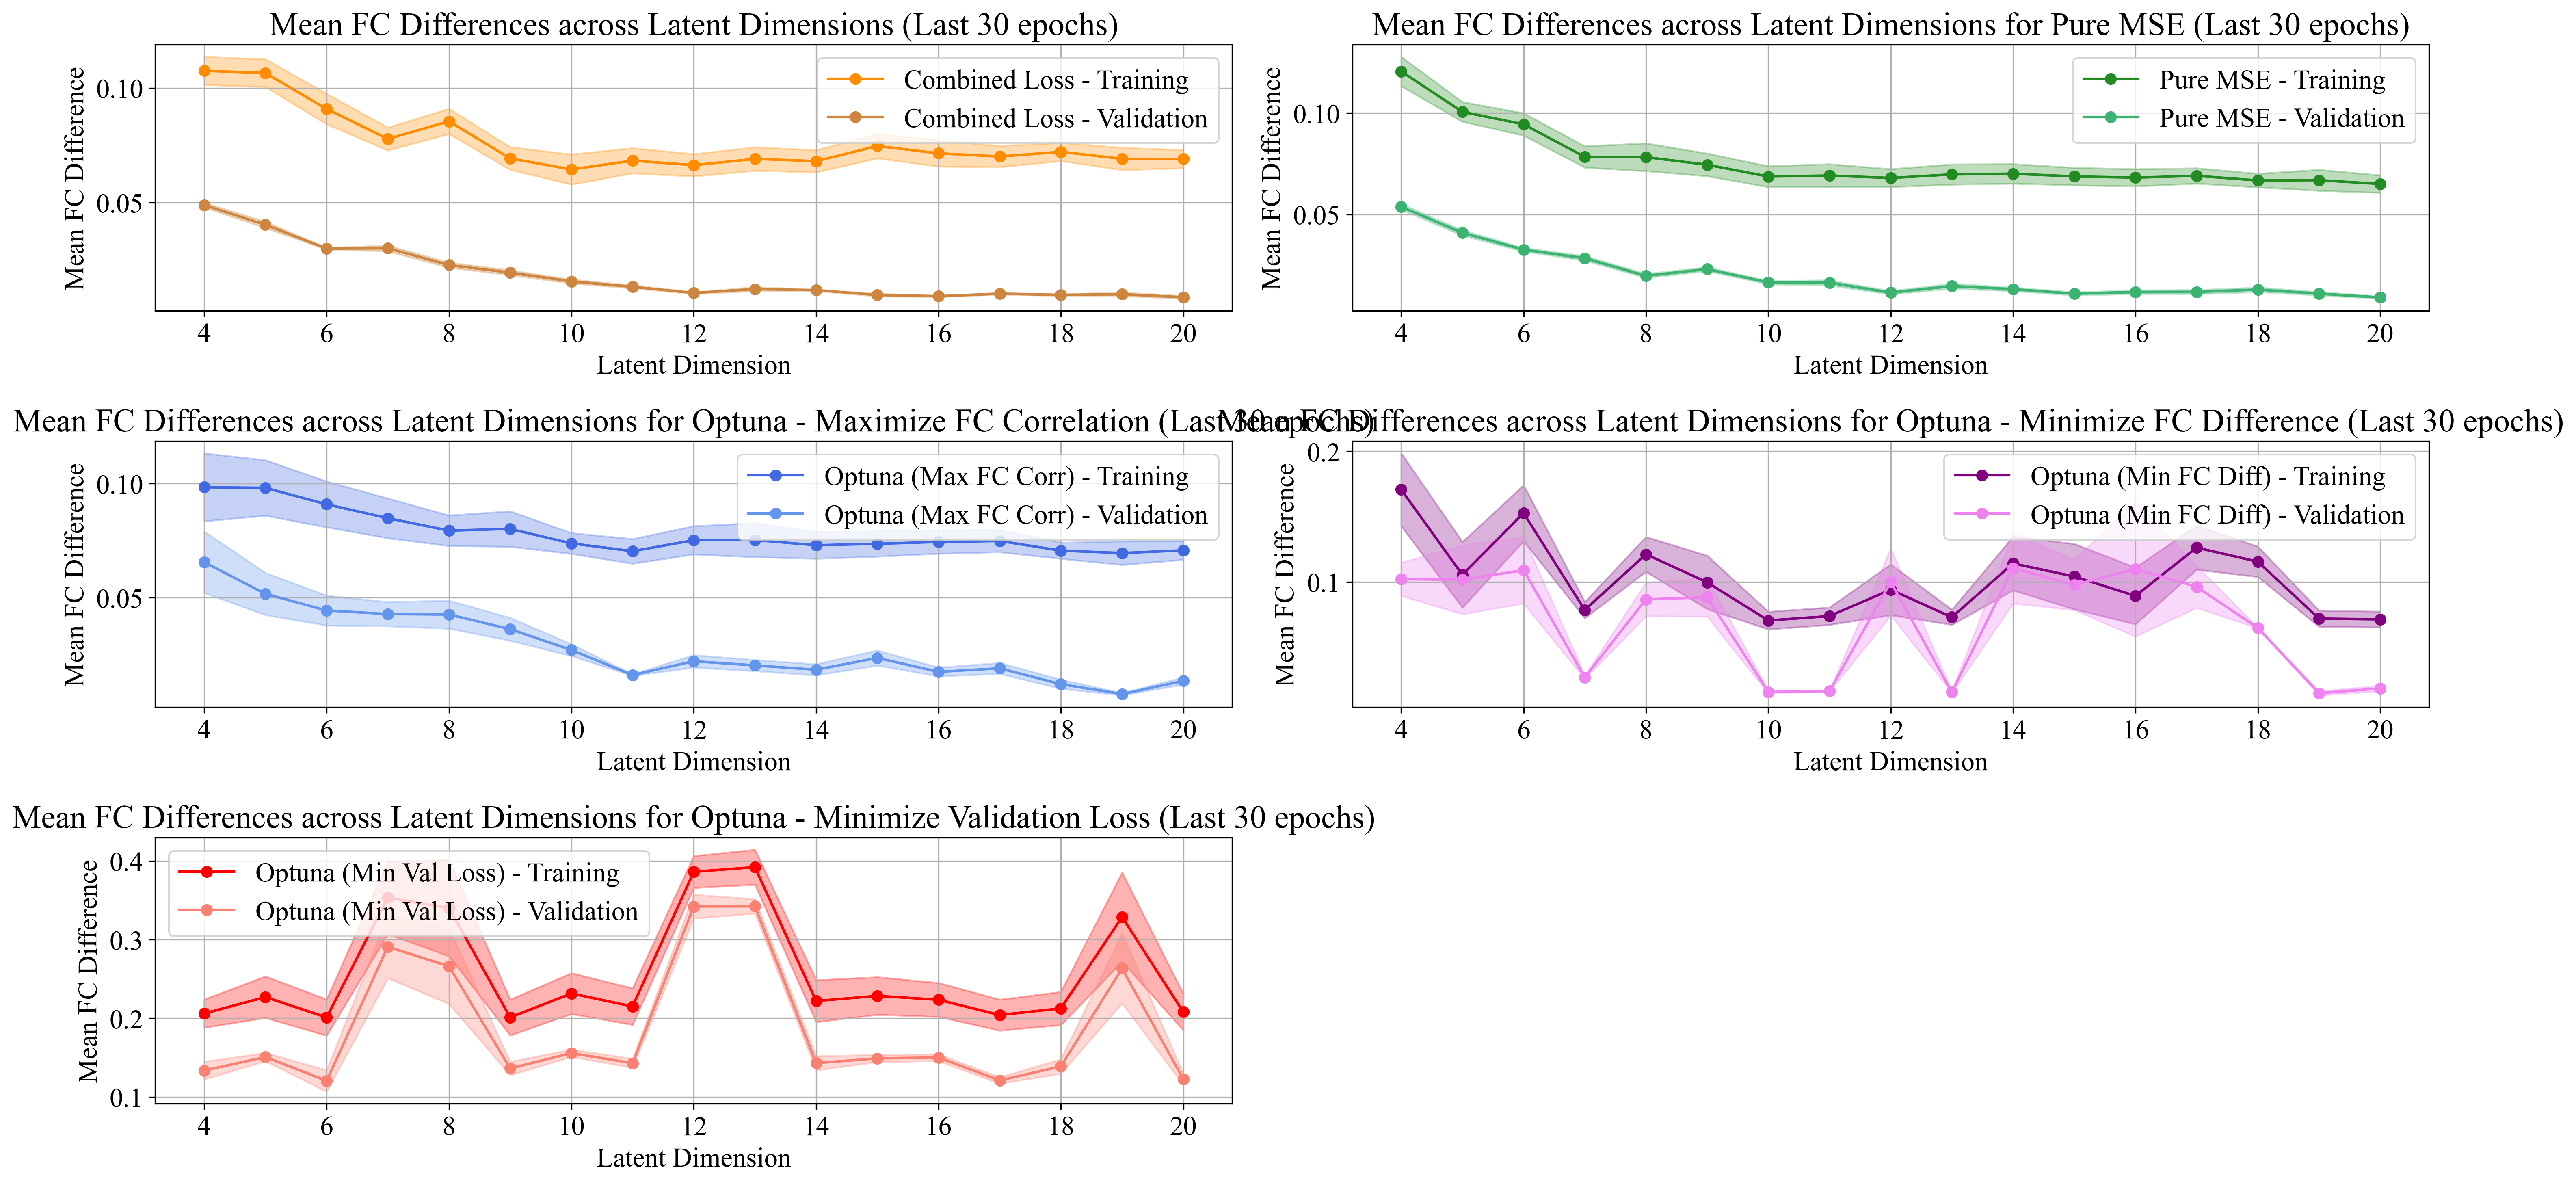

In [333]:
# Example usage:
plt.figure(figsize=(20, 10))

# Plot for Combined Loss
plt.subplot(3, 2, 1)
fc_diff_train_combined_last_n, fc_diff_val_combined_last_n, fc_diff_train_combined_std, fc_diff_val_combined_std = plot_fc_diff(
    df, latent_dims, 30, combined_train, combined_val, 
    'Mean FC Differences across Latent Dimensions (Last 30 epochs)', 
    'Combined Loss - Training', 'Combined Loss - Validation'
)

# Plot for Pure MSE
plt.subplot(3, 2, 2)
fc_diff_train_mse_last_n, fc_diff_val_mse_last_n, fc_diff_train_mse_std, fc_diff_val_mse_std = plot_fc_diff(
    df_mse, latent_dims, 30, mse_train, mse_val,
    'Mean FC Differences across Latent Dimensions for Pure MSE (Last 30 epochs)',
    'Pure MSE - Training', 'Pure MSE - Validation'
)

# Plot for Optuna - Maximize FC Correlation
plt.subplot(3, 2, 3)
fc_diff_train_corr_last_n, fc_diff_val_corr_last_n, fc_diff_train_corr_std, fc_diff_val_corr_std = plot_fc_diff(
    df_optuna, latent_dims, 30, optuna_train, optuna_val,
    'Mean FC Differences across Latent Dimensions for Optuna - Maximize FC Correlation (Last 30 epochs)',
    'Optuna (Max FC Corr) - Training', 'Optuna (Max FC Corr) - Validation'
)

# Plot for Optuna - Minimize FC MSE
plt.subplot(3, 2, 4)
fc_diff_train_diff_last_n, fc_diff_val_diff_last_n, fc_diff_train_diff_std, fc_diff_val_diff_std = plot_fc_diff(
    df_optuna_diff, latent_dims, 30, optuna_diff_train, optuna_diff_val,
    'Mean FC Differences across Latent Dimensions for Optuna - Minimize FC Difference (Last 30 epochs)',
    'Optuna (Min FC Diff) - Training', 'Optuna (Min FC Diff) - Validation'
)

# Plot for Optuna - Minimize Validation Loss
plt.subplot(3, 2, 5)
fc_diff_train_val_last_n, fc_diff_val_val_last_n, fc_diff_train_val_std, fc_diff_val_val_std = plot_fc_diff(
    df_optuna_val, latent_dims, 30, optuna_val_train, optuna_val_val,
    'Mean FC Differences across Latent Dimensions for Optuna - Minimize Validation Loss (Last 30 epochs)',
    'Optuna (Min Val Loss) - Training', 'Optuna (Min Val Loss) - Validation'
)

plt.tight_layout()
plt.show()

In [334]:
# Define significance level
significance_level = 0.05

# Arrays to store significance results
train_significance_mse = []
val_significance_mse = []
train_significance_optuna = []
val_significance_optuna = []

# Iterate over each latent dimension
for dim in range(4, len(latent_dims) + 4):
    fc_diff_train_combined_dim = fc_diff_train_combined_last_n[dim]
    fc_diff_train_mse_dim = fc_diff_train_mse_last_n[dim]
    fc_diff_train_optuna_dim = fc_diff_train_corr_last_n[dim]

    fc_diff_val_combined_dim = fc_diff_val_combined_last_n[dim]
    fc_diff_val_mse_dim = fc_diff_val_mse_last_n[dim]
    fc_diff_val_optuna_dim = fc_diff_val_corr_last_n[dim]
    
    # Perform Wilcoxon signed-rank test for each pair of FC differences (training and validation)
    w_statistic_train, p_train = wilcoxon(fc_diff_train_combined_dim, fc_diff_train_mse_dim)
    w_statistic_val, p_val = wilcoxon(fc_diff_val_combined_dim, fc_diff_val_mse_dim)

    train_significance_mse.append(1 if p_train < significance_level else 0)
    val_significance_mse.append(1 if p_val < significance_level else 0)

    w_statistic_train, p_train = wilcoxon(fc_diff_train_combined_dim, fc_diff_train_optuna_dim)
    w_statistic_val, p_val = wilcoxon(fc_diff_val_combined_dim, fc_diff_val_optuna_dim)

    train_significance_optuna.append(1 if p_train < significance_level else 0)
    val_significance_optuna.append(1 if p_val < significance_level else 0)

In [335]:
def plot_fc_comparison_separate(latent_dims, data, significance, colors, markers, linestyles, labels):
    fig, axes = plt.subplots(1, 1, figsize=(12, 5))  # Create subplots with 1 row and 2 columns

    # # Plot training data
    # for i, (fc_diff_train, fc_diff_val, fc_diff_train_std, fc_diff_val_std) in enumerate(data):
    #     fc_diff_train_value = fc_diff_train.groupby('lat').mean()
        
    #     color = colors[i]
    #     marker = markers[i]
    #     linestyle = linestyles[i]
    #     label_train = labels[i] + ' - Training'
        
    #     axes[0].plot(latent_dims, fc_diff_train_value, label=label_train, marker=marker, ls=linestyle, ms=8, color=color)
    #     axes[0].fill_between(latent_dims, fc_diff_train_value - fc_diff_train_std, fc_diff_train_value + fc_diff_train_std, alpha=0.3, color=color)
        
    # # Add significance annotations for training
    # for j, dim in enumerate(latent_dims):
    #     for i, (train_sig, _, col_sig) in enumerate(significance):
    #         if train_sig[j] == 1:
    #             mean_point = data[0][0][dim].mean()
    #             axes[0].annotate('*', (dim, mean_point), textcoords="offset points", xytext=(0, 60 + i * 50), ha='center', color=col_sig, fontsize=25)

    # axes[0].set_title('Training: Mean MSE between original and reconstructed\nFC matrices across latent dimensions (final 30 epochs)')
    # axes[0].set_xlabel('Latent Dimension')
    # axes[0].set_ylabel('Mean FC difference (final 30 epochs)')
    # axes[0].legend(loc='upper right')
    # axes[0].grid(True)
    
    # # Plot validation data
    # for i, (fc_diff_train, fc_diff_val, fc_diff_train_std, fc_diff_val_std) in enumerate(data):
    #     fc_diff_val_value = fc_diff_val.groupby('lat').mean()

    #     color = colors[i]
    #     marker = markers[i]
    #     linestyle = linestyles[i]
    #     label_val = labels[i] + ' - Validation'
        
    #     axes[1].plot(latent_dims, fc_diff_val_value, label=label_val, marker=marker, ls=linestyle, ms=8, color=color)
    #     axes[1].fill_between(latent_dims, fc_diff_val_value - fc_diff_val_std, fc_diff_val_value + fc_diff_val_std, alpha=0.3, color=color)
        
    # # Add significance annotations for validation
    # for j, dim in enumerate(latent_dims):
    #     for i, (_, val_sig, col_sig) in enumerate(significance):
    #         if val_sig[j] == 1:
    #             mean_point = data[0][1][dim].mean()
    #             axes[1].annotate('*', (dim, mean_point), textcoords="offset points", xytext=(0, 40 + i * 40), ha='center', color=col_sig, fontsize=25)

    # axes[1].set_title('Validation: Mean MSE between original and reconstructed\nFC matrices across latent dimensions (final 30 epochs)')
    # axes[1].set_xlabel('Latent Dimension')
    # axes[1].set_ylabel('Mean FC difference (final 30 epochs)')
    # axes[1].legend(loc='upper right')
    # axes[1].grid(True)

    # plt.tight_layout()
    # plt.show()

    for i, (fc_corr_train, fc_corr_val, fc_corr_train_std, fc_corr_val_std) in enumerate(data):
        fc_corr_train_value = fc_corr_train.groupby('lat').mean()
        fc_corr_val_value = fc_corr_val.groupby('lat').mean()

        color = colors[i]
        marker = markers[i]
        linestyle = linestyles[i]
        label_train = labels[i] + ' - Training'
        label_val = labels[i] + ' - Validation'

        # axes.plot(latent_dims, fc_corr_train_value, label=label_train, marker=marker, ls=linestyle, ms=8, color=color)
        axes.plot(latent_dims, fc_corr_val_value, label=label_val, marker=marker, ls=linestyle, ms=8, color=color)
        # axes.fill_between(latent_dims, fc_corr_train_value - fc_corr_train_std, fc_corr_train_value + fc_corr_train_std, alpha=0.3, color=color)
        axes.fill_between(latent_dims, fc_corr_val_value - fc_corr_val_std, fc_corr_val_value + fc_corr_val_std, alpha=0.3, color=color)

    # Add significance annotations for validation
    for j, dim in enumerate(latent_dims):
        for i, (_, val_sig, col_sig) in enumerate(significance):
            if val_sig[j] == 1:
                mean_point = data[0][1][dim].mean()
                axes.annotate('*', (dim, mean_point), textcoords="offset points", xytext=(0, 50 + i * 50), ha='center', color=col_sig, fontsize=25)

    # axes.set_title('Mean FC correlation between original and reconstructed\nFC matrices across latent dimensions (final 30 epochs)')
    axes.set_xlabel('Latent dimension')
    axes.set_ylabel('Mean FC difference (final 30 epochs)')
    axes.set_ylim(0.0, 0.1)
    axes.legend(loc='upper right')
    axes.grid(True)

    plt.tight_layout()
    plt.show()


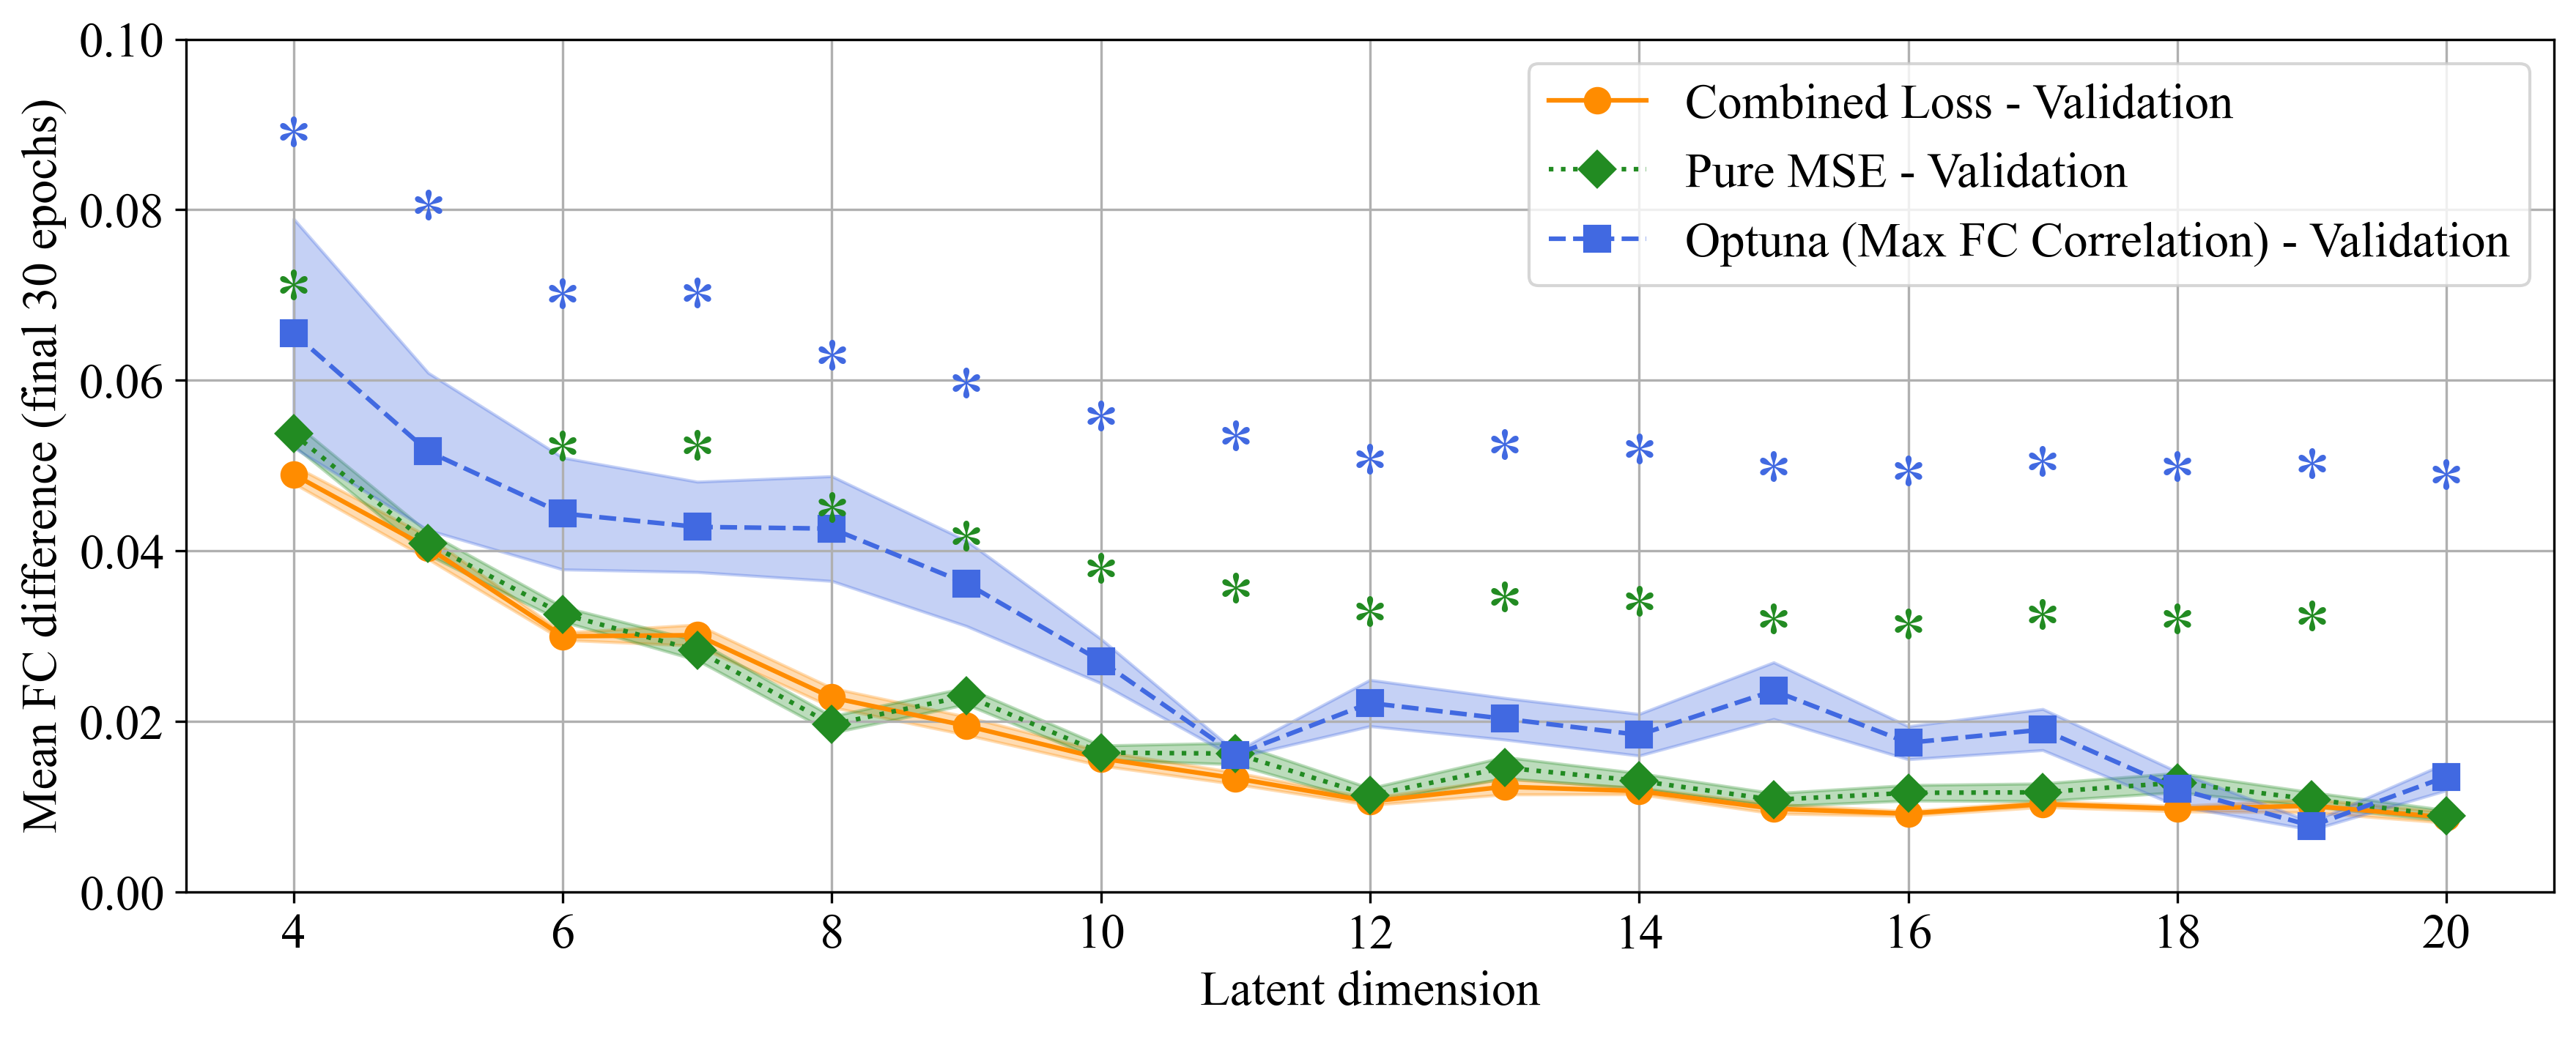

In [336]:
data = [
    (fc_diff_train_combined_last_n, fc_diff_val_combined_last_n, fc_diff_train_combined_std, fc_diff_val_combined_std),
    (fc_diff_train_mse_last_n, fc_diff_val_mse_last_n, fc_diff_train_mse_std, fc_diff_val_mse_std),
    (fc_diff_train_corr_last_n, fc_diff_val_corr_last_n, fc_diff_train_corr_std, fc_diff_val_corr_std)
]

significance = [
    (train_significance_mse, val_significance_mse, mse_train),
    (train_significance_optuna, val_significance_optuna, optuna_train)
]

colors = [combined_train, mse_train, optuna_train]
markers = ['o', 'D', 's']
linestyles = ['-', ':', '--']
labels = ['Combined Loss', 'Pure MSE', 'Optuna (Max FC Correlation)']

plot_fc_comparison_separate(latent_dims, data, significance, colors, markers, linestyles, labels)

In [337]:
def plot_fc_corr(df, latent_dims, last_n, train_color, val_color, title, train_label, val_label):
    fc_corr_train_last_n = df.groupby('lat')['corr_train'].apply(lambda x: x[-last_n:])
    fc_corr_val_last_n = df.groupby('lat')['corr_val'].apply(lambda x: x[-last_n:])

    fc_corr_train_last_n_mean = fc_corr_train_last_n.groupby('lat').mean()
    fc_corr_val_last_n_mean = fc_corr_val_last_n.groupby('lat').mean()

    fc_corr_train_last_n_std = fc_corr_train_last_n.groupby('lat').std()
    fc_corr_val_last_n_std = fc_corr_val_last_n.groupby('lat').std()

    plt.plot(latent_dims, fc_corr_train_last_n_mean, label=train_label, marker='o', color=train_color)
    plt.plot(latent_dims, fc_corr_val_last_n_mean, label=val_label, marker='o', color=val_color)
    plt.fill_between(latent_dims, fc_corr_train_last_n_mean - fc_corr_train_last_n_std, fc_corr_train_last_n_mean + fc_corr_train_last_n_std, alpha=0.3, color=train_color)
    plt.fill_between(latent_dims, fc_corr_val_last_n_mean - fc_corr_val_last_n_std, fc_corr_val_last_n_mean + fc_corr_val_last_n_std, alpha=0.3, color=val_color)
    plt.title(title)
    plt.xlabel('Latent Dimension')
    plt.ylabel('Mean FC Correlation')
    plt.legend()
    plt.grid(True)

    return fc_corr_train_last_n, fc_corr_val_last_n, fc_corr_train_last_n_std, fc_corr_val_last_n_std

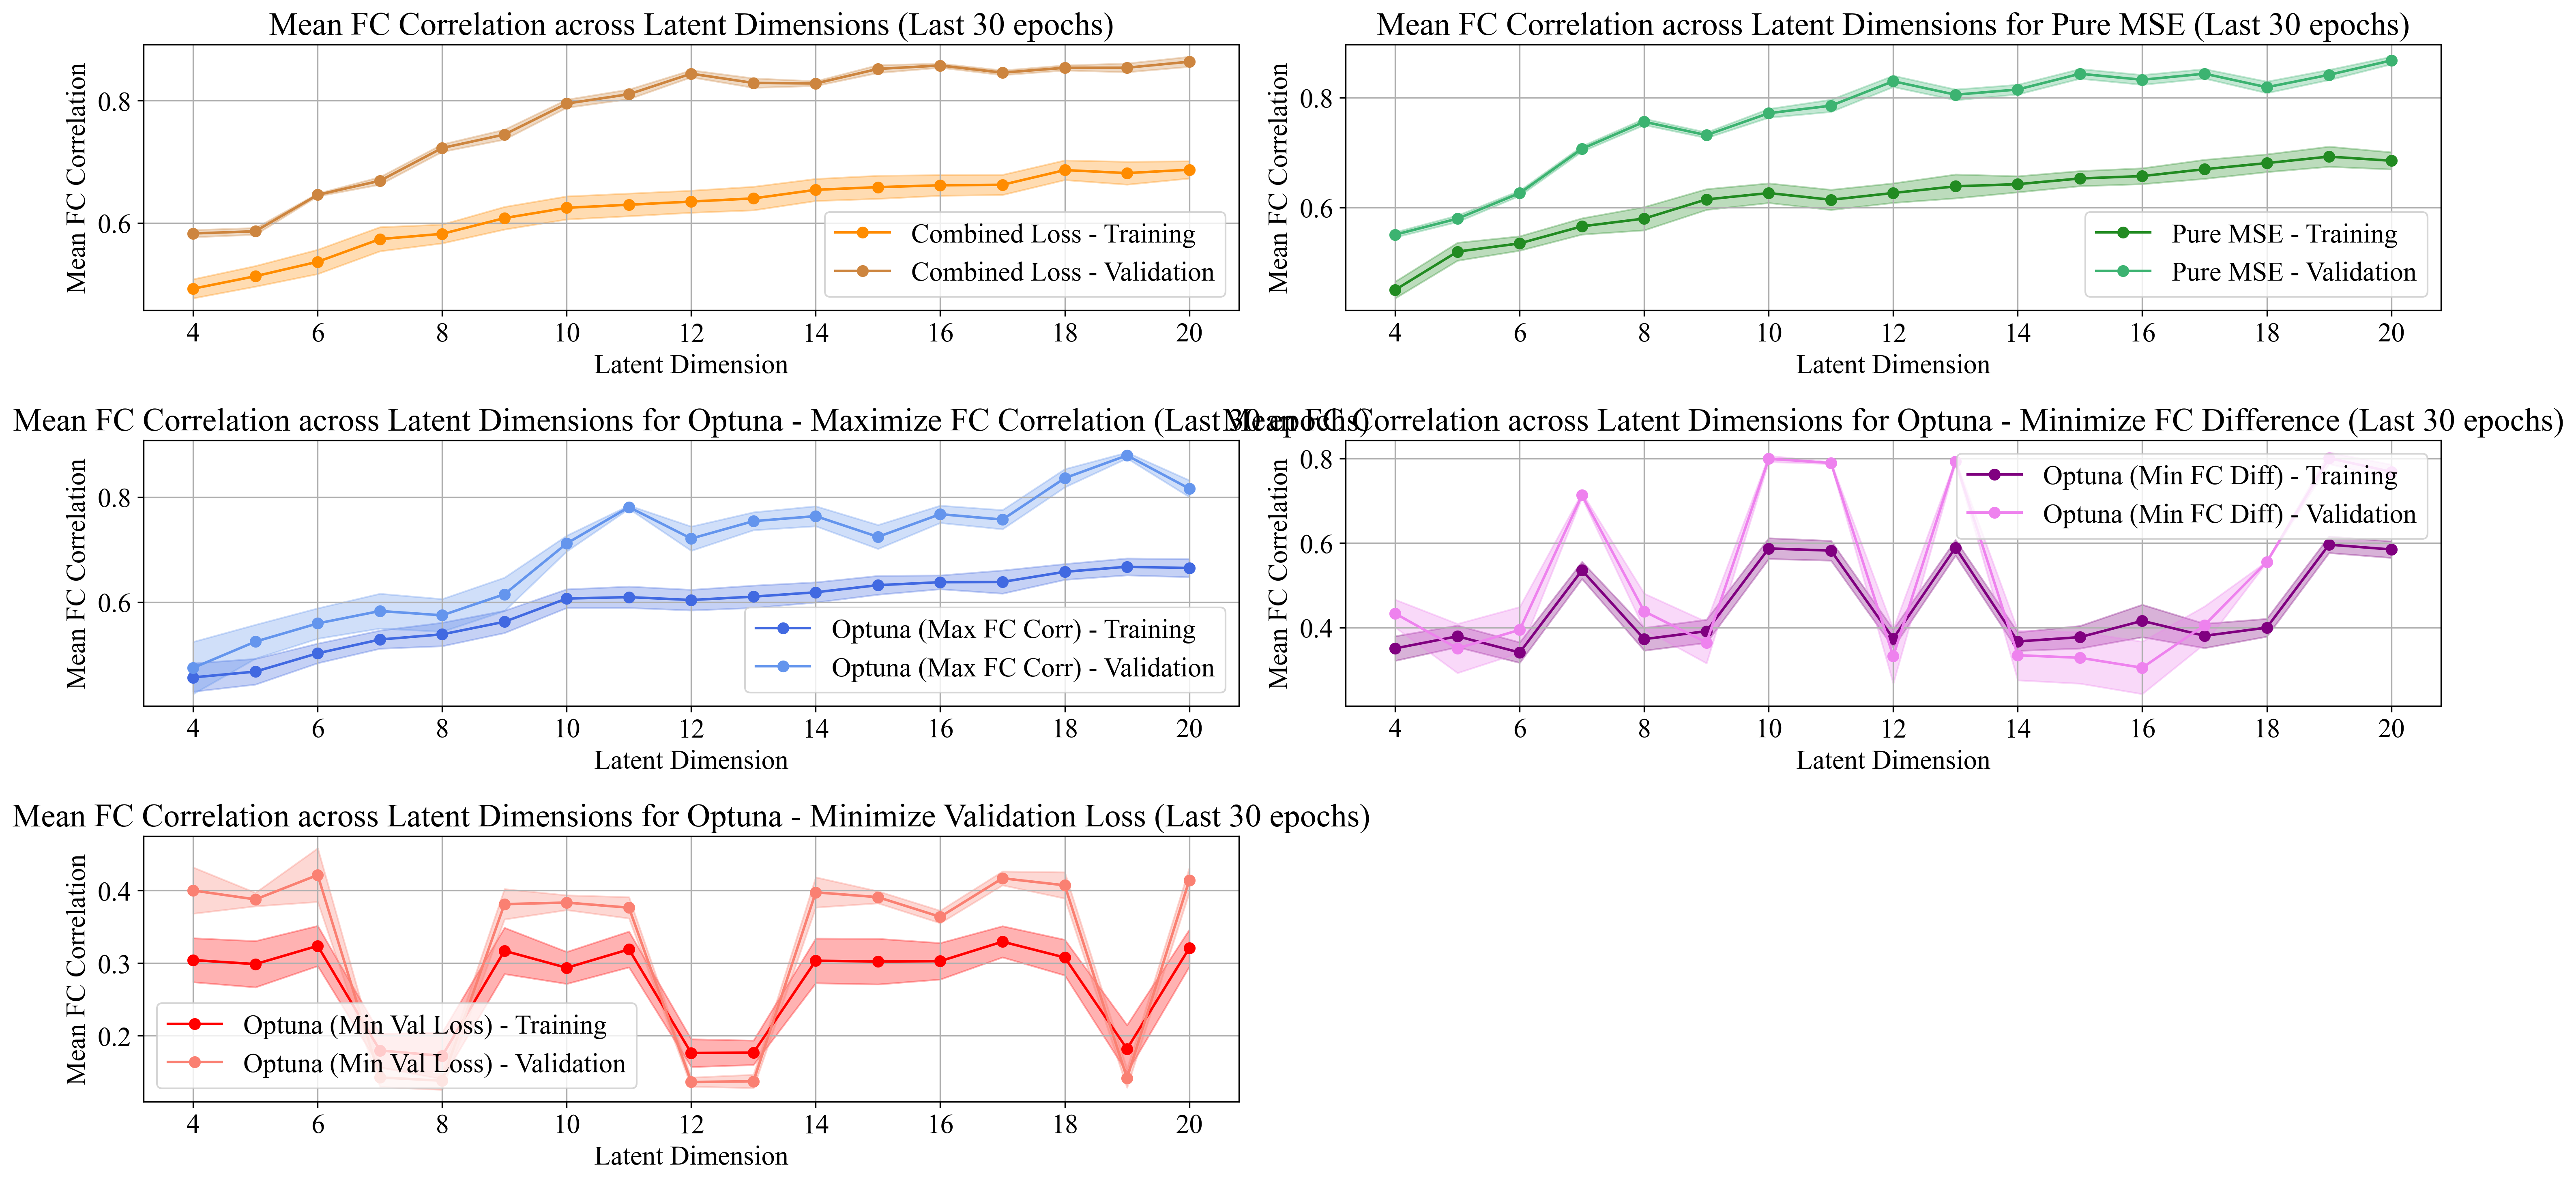

In [338]:
# Example usage:
plt.figure(figsize=(20, 10))

# Plot for Combined Loss
plt.subplot(3, 2, 1)
fc_corr_train_combined_last_n, fc_corr_val_combined_last_n, fc_corr_train_combined_std, fc_corr_val_combined_std = plot_fc_corr(
    df, latent_dims, 30, combined_train, combined_val, 
    'Mean FC Correlation across Latent Dimensions (Last 30 epochs)', 
    'Combined Loss - Training', 'Combined Loss - Validation'
)

# Plot for Pure MSE
plt.subplot(3, 2, 2)
fc_corr_train_mse_last_n, fc_corr_val_mse_last_n, fc_corr_train_mse_std, fc_corr_val_mse_std = plot_fc_corr(
    df_mse, latent_dims, 30, mse_train, mse_val,
    'Mean FC Correlation across Latent Dimensions for Pure MSE (Last 30 epochs)',
    'Pure MSE - Training', 'Pure MSE - Validation'
)

# Plot for Optuna - Maximize FC Correlation
plt.subplot(3, 2, 3)
fc_corr_train_corr_last_n, fc_corr_val_corr_last_n, fc_corr_train_corr_std, fc_corr_val_corr_std = plot_fc_corr(
    df_optuna, latent_dims, 30, optuna_train, optuna_val,
    'Mean FC Correlation across Latent Dimensions for Optuna - Maximize FC Correlation (Last 30 epochs)',
    'Optuna (Max FC Corr) - Training', 'Optuna (Max FC Corr) - Validation'
)

# Plot for Optuna - Minimize FC MSE
plt.subplot(3, 2, 4)
fc_corr_train_diff_last_n, fc_corr_val_diff_last_n, fc_corr_train_diff_std, fc_corr_val_diff_std = plot_fc_corr(
    df_optuna_diff, latent_dims, 30, optuna_diff_train, optuna_diff_val,
    'Mean FC Correlation across Latent Dimensions for Optuna - Minimize FC Difference (Last 30 epochs)',
    'Optuna (Min FC Diff) - Training', 'Optuna (Min FC Diff) - Validation'
)

# Plot for Optuna - Minimize Validation Loss
plt.subplot(3, 2, 5)
fc_corr_train_val_last_n, fc_corr_val_val_last_n, fc_corr_train_val_std, fc_corr_val_val_std = plot_fc_corr(
    df_optuna_val, latent_dims, 30, optuna_val_train, optuna_val_val,
    'Mean FC Correlation across Latent Dimensions for Optuna - Minimize Validation Loss (Last 30 epochs)',
    'Optuna (Min Val Loss) - Training', 'Optuna (Min Val Loss) - Validation'
)

plt.tight_layout()
plt.show()

In [339]:
# Define significance level
significance_level = 0.05

# Arrays to store significance results
train_significance_mse = []
val_significance_mse = []
train_significance_optuna = []
val_significance_optuna = []

# Iterate over each latent dimension
for dim in range(4, len(latent_dims) + 4):
    fc_corr_train_combined_dim = fc_corr_train_combined_last_n[dim]
    fc_corr_train_mse_dim = fc_corr_train_mse_last_n[dim]
    fc_corr_train_optuna_dim = fc_corr_train_corr_last_n[dim]

    fc_corr_val_combined_dim = fc_corr_val_combined_last_n[dim]
    fc_corr_val_mse_dim = fc_corr_val_mse_last_n[dim]
    fc_corr_val_optuna_dim = fc_corr_val_corr_last_n[dim]
    
    # Perform Wilcoxon signed-rank test for each pair of FC differences (training and validation)
    w_statistic_train, p_train = wilcoxon(fc_corr_train_combined_dim, fc_corr_train_mse_dim)
    w_statistic_val, p_val = wilcoxon(fc_corr_val_combined_dim, fc_corr_val_mse_dim)

    train_significance_mse.append(1 if p_train < significance_level else 0)
    val_significance_mse.append(1 if p_val < significance_level else 0)

    w_statistic_train, p_train = wilcoxon(fc_corr_train_combined_dim, fc_corr_train_optuna_dim)
    w_statistic_val, p_val = wilcoxon(fc_corr_val_combined_dim, fc_corr_val_optuna_dim)

    train_significance_optuna.append(1 if p_train < significance_level else 0)
    val_significance_optuna.append(1 if p_val < significance_level else 0)

In [351]:
def plot_fc_comparison_separate(latent_dims, data, significance, colors, markers, linestyles, labels):
    fig, axes = plt.subplots(1, 1, figsize=(12, 5))  # Create subplots with 1 row and 2 columns

    # Plot training data
    # for i, (fc_corr_train, fc_corr_val, fc_corr_train_std, fc_corr_val_std) in enumerate(data):
    #     fc_corr_train_value = fc_corr_train.groupby('lat').mean()
        
    #     color = colors[i]
    #     marker = markers[i]
    #     linestyle = linestyles[i]
    #     label_train = labels[i] + ' - Training'
        
    #     axes[0].plot(latent_dims, fc_corr_train_value, label=label_train, marker=marker, ls=linestyle, ms=8, color=color)
    #     axes[0].fill_between(latent_dims, fc_corr_train_value - fc_corr_train_std, fc_corr_train_value + fc_corr_train_std, alpha=0.3, color=color)

    # # Add significance annotations for training
    # for j, dim in enumerate(latent_dims):
    #     for i, (train_sig, _, col_sig) in enumerate(significance):
    #         if train_sig[j] == 1:
    #             mean_point = data[0][0][dim].mean()
    #             axes[0].annotate('*', (dim, mean_point), textcoords="offset points", xytext=(0, 35 + i * 35), ha='center', color=col_sig, fontsize=25)

    # axes[0].set_title('Training: Mean FC Correlation between original and reconstructed\nFC matrices across latent dimensions (final 30 epochs)')
    # axes[0].set_xlabel('Latent Dimension')
    # axes[0].set_ylabel('Mean FC Correlation (final 30 epochs)')
    # axes[0].set_ylim(0.4, 0.9)
    # axes[0].legend(loc='upper left')
    # axes[0].grid(True)

    # Plot validation data
    # for i, (fc_corr_train, fc_corr_val, fc_corr_train_std, fc_corr_val_std) in enumerate(data):
    #     fc_corr_val_value = fc_corr_val.groupby('lat').mean()

    #     color = colors[i]
    #     marker = markers[i]
    #     linestyle = linestyles[i]
    #     label_val = labels[i] + ' - Validation'
        
    #     axes[1].plot(latent_dims, fc_corr_val_value, label=label_val, marker=marker, ls=linestyle, ms=8, color=color)
    #     axes[1].fill_between(latent_dims, fc_corr_val_value - fc_corr_val_std, fc_corr_val_value + fc_corr_val_std, alpha=0.3, color=color)

    # # Add significance annotations for validation
    # for j, dim in enumerate(latent_dims):
    #     for i, (_, val_sig, col_sig) in enumerate(significance):
    #         if val_sig[j] == 1:
    #             mean_point = data[0][1][dim].mean()
    #             axes[1].annotate('*', (dim, mean_point), textcoords="offset points", xytext=(0, 40 + i * 40), ha='center', color=col_sig, fontsize=25)

    # axes[1].set_title('Validation: Mean FC Correlation between original and reconstructed\nFC matrices across latent dimensions (final 30 epochs)')
    # axes[1].set_xlabel('Latent Dimension')
    # axes[1].set_ylabel('Mean FC Correlation (final 30 epochs)')
    # axes[1].set_ylim(0.4, 1)
    # axes[1].legend(loc='upper left')
    # axes[1].grid(True)

    # plt.tight_layout()
    # plt.show()

    for i, (fc_corr_train, fc_corr_val, fc_corr_train_std, fc_corr_val_std) in enumerate(data):
        fc_corr_train_value = fc_corr_train.groupby('lat').mean()
        fc_corr_val_value = fc_corr_val.groupby('lat').mean()

        color = colors[i]
        marker = markers[i]
        linestyle = linestyles[i]
        label_train = labels[i] + ' - Training'
        label_val = labels[i] + ' - Validation'

        # axes.plot(latent_dims, fc_corr_train_value, label=label_train, marker=marker, ls=linestyle, ms=8, color=color)
        axes.plot(latent_dims, fc_corr_val_value, label=label_val, marker=marker, ls=linestyle, ms=8, color=color)
        # axes.fill_between(latent_dims, fc_corr_train_value - fc_corr_train_std, fc_corr_train_value + fc_corr_train_std, alpha=0.3, color=color)
        axes.fill_between(latent_dims, fc_corr_val_value - fc_corr_val_std, fc_corr_val_value + fc_corr_val_std, alpha=0.3, color=color)

    # Add significance annotations for validation
    for j, dim in enumerate(latent_dims):
        for i, (_, val_sig, col_sig) in enumerate(significance):
            if val_sig[j] == 1:
                mean_point = data[0][1][dim].mean()
                axes.annotate('*', (dim, mean_point), textcoords="offset points", xytext=(0, 20 + i * 20), ha='center', color=col_sig, fontsize=25)

    # axes.set_title('Mean FC correlation between original and reconstructed\nFC matrices across latent dimensions (final 30 epochs)')
    axes.set_xlabel('Latent dimension')
    axes.set_ylabel('Mean FC correlation (final 30 epochs)')
    axes.set_ylim(0.4, 1)
    axes.legend(loc='lower right')
    axes.grid(True)

    plt.tight_layout()
    plt.show()


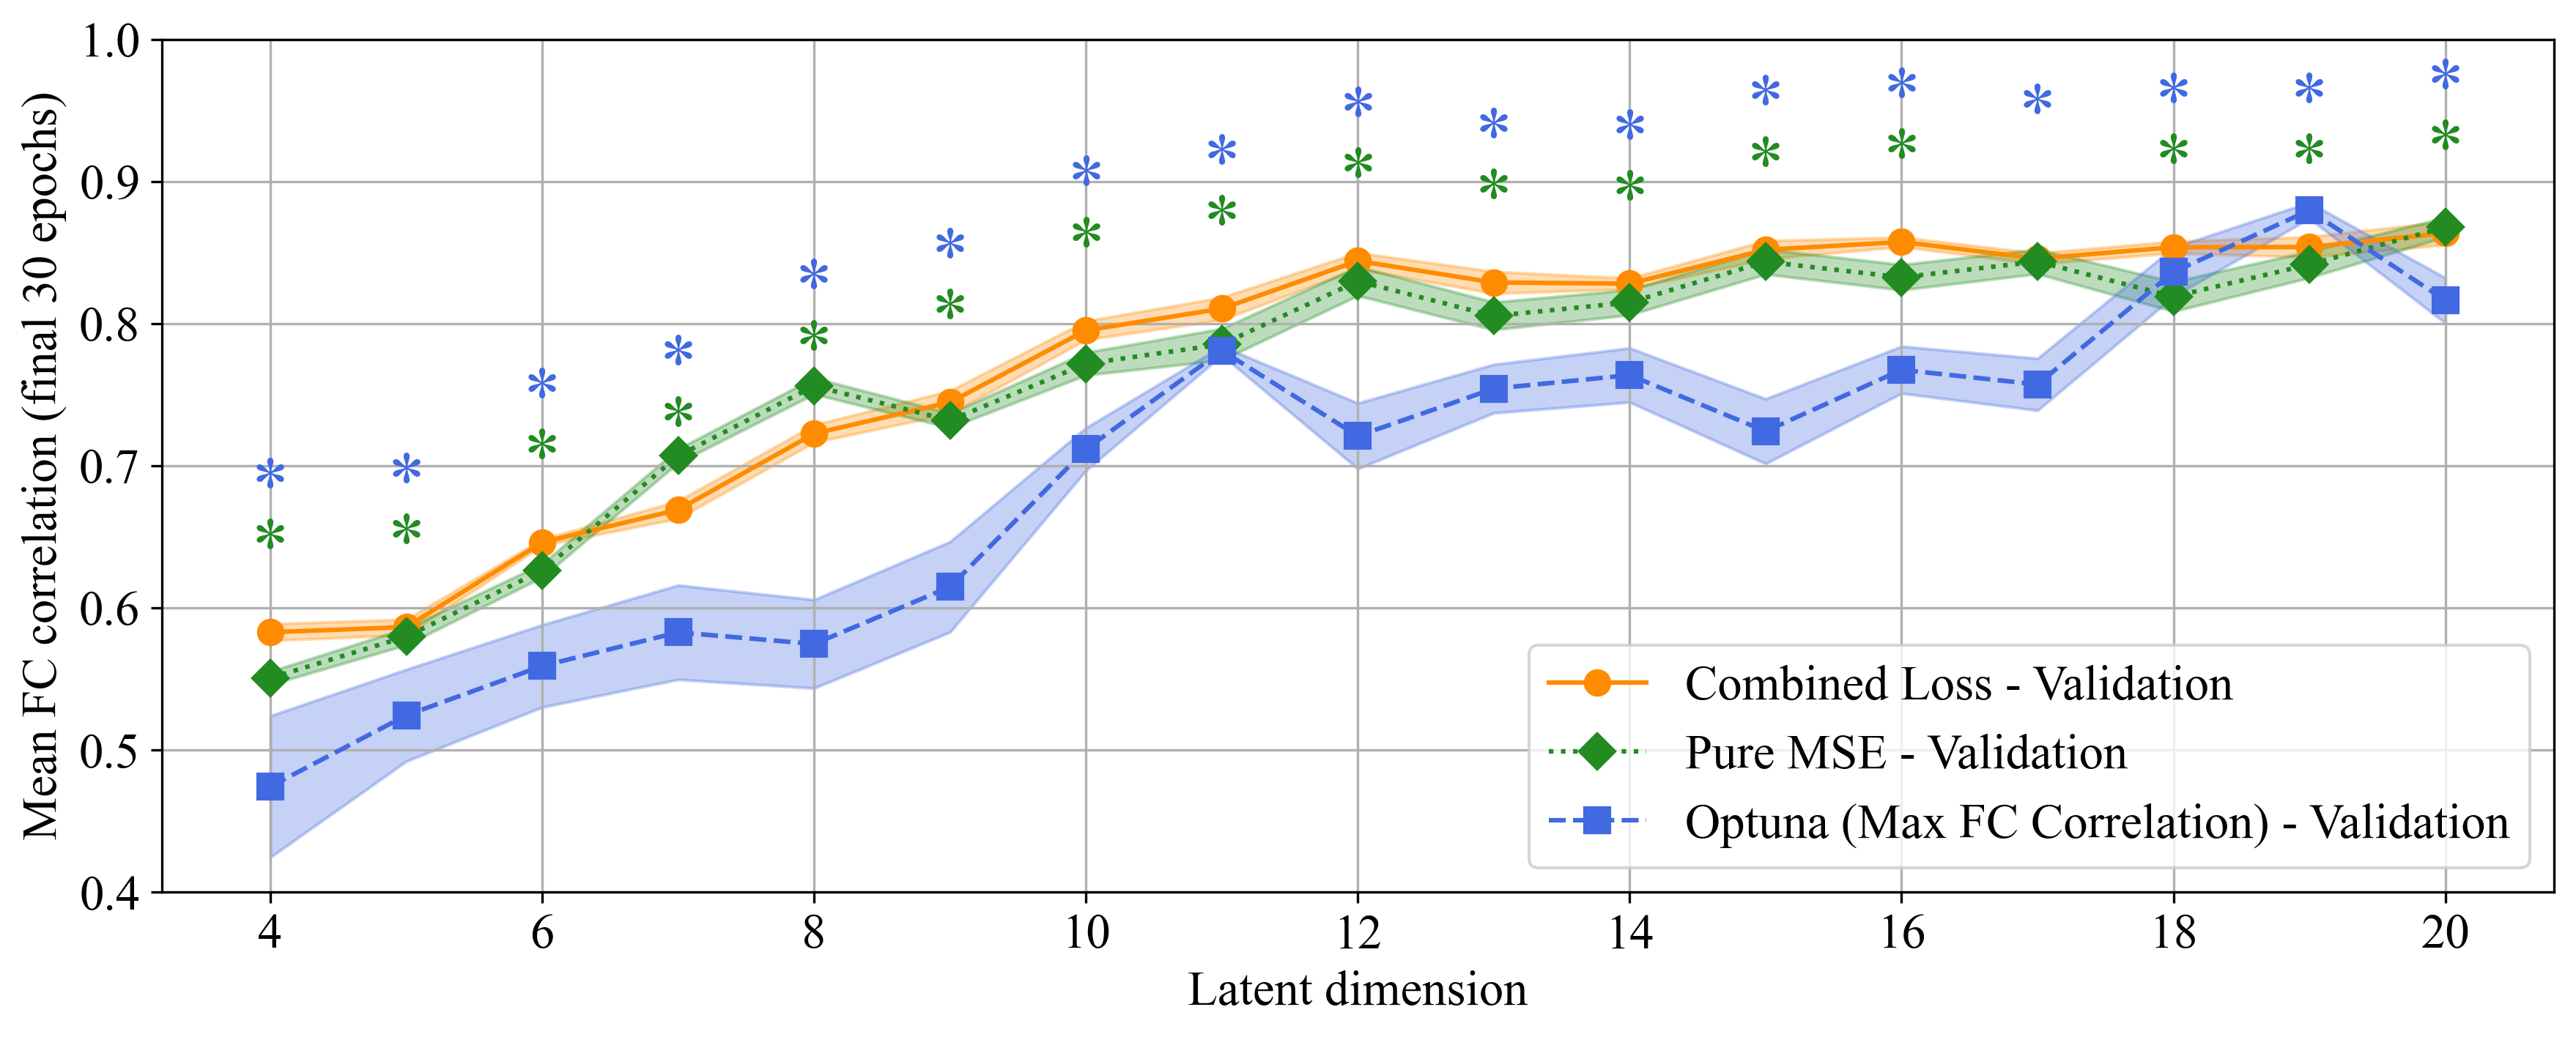

In [352]:
data = [
    (fc_corr_train_combined_last_n, fc_corr_val_combined_last_n, fc_corr_train_combined_std, fc_corr_val_combined_std),
    (fc_corr_train_mse_last_n, fc_corr_val_mse_last_n, fc_corr_train_mse_std, fc_corr_val_mse_std),
    (fc_corr_train_corr_last_n, fc_corr_val_corr_last_n, fc_corr_train_corr_std, fc_corr_val_corr_std)
]

significance = [
    (train_significance_mse, val_significance_mse, mse_train),
    (train_significance_optuna, val_significance_optuna, optuna_train)
]

colors = [combined_train, mse_train, optuna_train]
markers = ['o', 'D', 's']
linestyles = ['-', ':', '--']
labels = ['Combined Loss', 'Pure MSE', 'Optuna (Max FC Correlation)']

plot_fc_comparison_separate(latent_dims, data, significance, colors, markers, linestyles, labels)

### CLASSIFIER PLOTS

In [342]:
from numpy import array
from sklearn.metrics import auc

In [343]:
reconstructed_accuracy = [0.6785714285714286, 0.8214285714285714, 0.75, 0.6785714285714286, 0.75, 0.75, 0.75, 0.8571428571428571, 0.8928571428571428, 0.9285714285714286, 0.8214285714285714, 0.8571428571428572, 0.7857142857142857, 0.9642857142857143, 0.8571428571428571, 0.8571428571428571, 0.9285714285714286]
reconstructed_precision = [0.6833333333333333, 0.8166666666666667, 0.7250000000000001, 0.5625, 0.8166666666666667, 0.8125, 0.775, 0.9, 0.9, 0.9375, 0.8375, 0.9, 0.8375, 1.0, 0.9375, 0.8875, 0.9375]
reconstructed_recall = [0.7083333333333333, 0.8333333333333333, 0.8541666666666666, 0.625, 0.7291666666666666, 0.6458333333333333, 0.8125, 0.8541666666666666, 0.9166666666666666, 0.9375, 0.875, 0.875, 0.8125, 0.9375, 0.7916666666666666, 0.8541666666666666, 0.9375]
reconstructed_f1 = [0.6597222222222222, 0.8111111111111111, 0.7668650793650793, 0.5684523809523809, 0.7351190476190476, 0.6952380952380952, 0.7559523809523809, 0.8517857142857143, 0.8875, 0.9285714285714286, 0.8303571428571429, 0.8541666666666666, 0.7827380952380952, 0.9642857142857143, 0.8428571428571429, 0.8507936507936508, 0.9285714285714286]
reconstructed_roc_auc = [0.6875, 0.8020833333333334, 0.7604166666666666, 0.6770833333333334, 0.7708333333333334, 0.7604166666666666, 0.7708333333333334, 0.8645833333333333, 0.8958333333333333, 0.9375, 0.84375, 0.875, 0.8125, 0.96875, 0.8645833333333333, 0.8541666666666666, 0.9375]
reconstructed_accuracy_std = [0.15567496226930977, 0.06185895741317416, 0.11845088536983571, 0.11845088536983571, 0.06185895741317416, 0.11845088536983571, 0.06185895741317416, 0.10101525445522107, 0.11845088536983571, 0.07142857142857145, 0.06185895741317416, 0.14285714285714285, 0.0714285714285714, 0.06185895741317421, 0.0, 0.0, 0.07142857142857145]
reconstructed_precision_std = [0.2466441431158124, 0.11902380714238084, 0.1920286436967152, 0.369754986443726, 0.18484227510682363, 0.2072890493972125, 0.1436140661634507, 0.17320508075688773, 0.17320508075688773, 0.10825317547305482, 0.1709349291397168, 0.17320508075688773, 0.1709349291397168, 0.0, 0.10825317547305482, 0.11388041973930373, 0.10825317547305482]
reconstructed_recall_std = [0.2975595178559521, 0.16666666666666669, 0.14877975892797604, 0.375, 0.18042195912175807, 0.2525907427704613, 0.2072890493972125, 0.14877975892797604, 0.14433756729740646, 0.10825317547305482, 0.125, 0.21650635094610965, 0.2072890493972125, 0.10825317547305482, 0.125, 0.14877975892797604, 0.10825317547305482]
reconstructed_f1_std = [0.20447822033799246, 0.0909483641319161, 0.124015872761921, 0.3350693526546935, 0.07823475850056497, 0.18735538640862856, 0.06760605173571754, 0.09359255486699042, 0.11388041973930373, 0.07142857142857145, 0.04639421805988062, 0.14877975892797604, 0.08002577178421875, 0.06185895741317421, 0.024743582965269635, 0.032061920439244655, 0.07142857142857145]
reconstructed_roc_auc_std = [0.16002386974726268, 0.0541265877365274, 0.11170630515378763, 0.13621559198564606, 0.06249999999999999, 0.13621559198564606, 0.06249999999999999, 0.09021097956087903, 0.10825317547305485, 0.0625, 0.05412658773652741, 0.125, 0.0625, 0.05412658773652741, 0.01804219591217584, 0.020833333333333343, 0.0625]

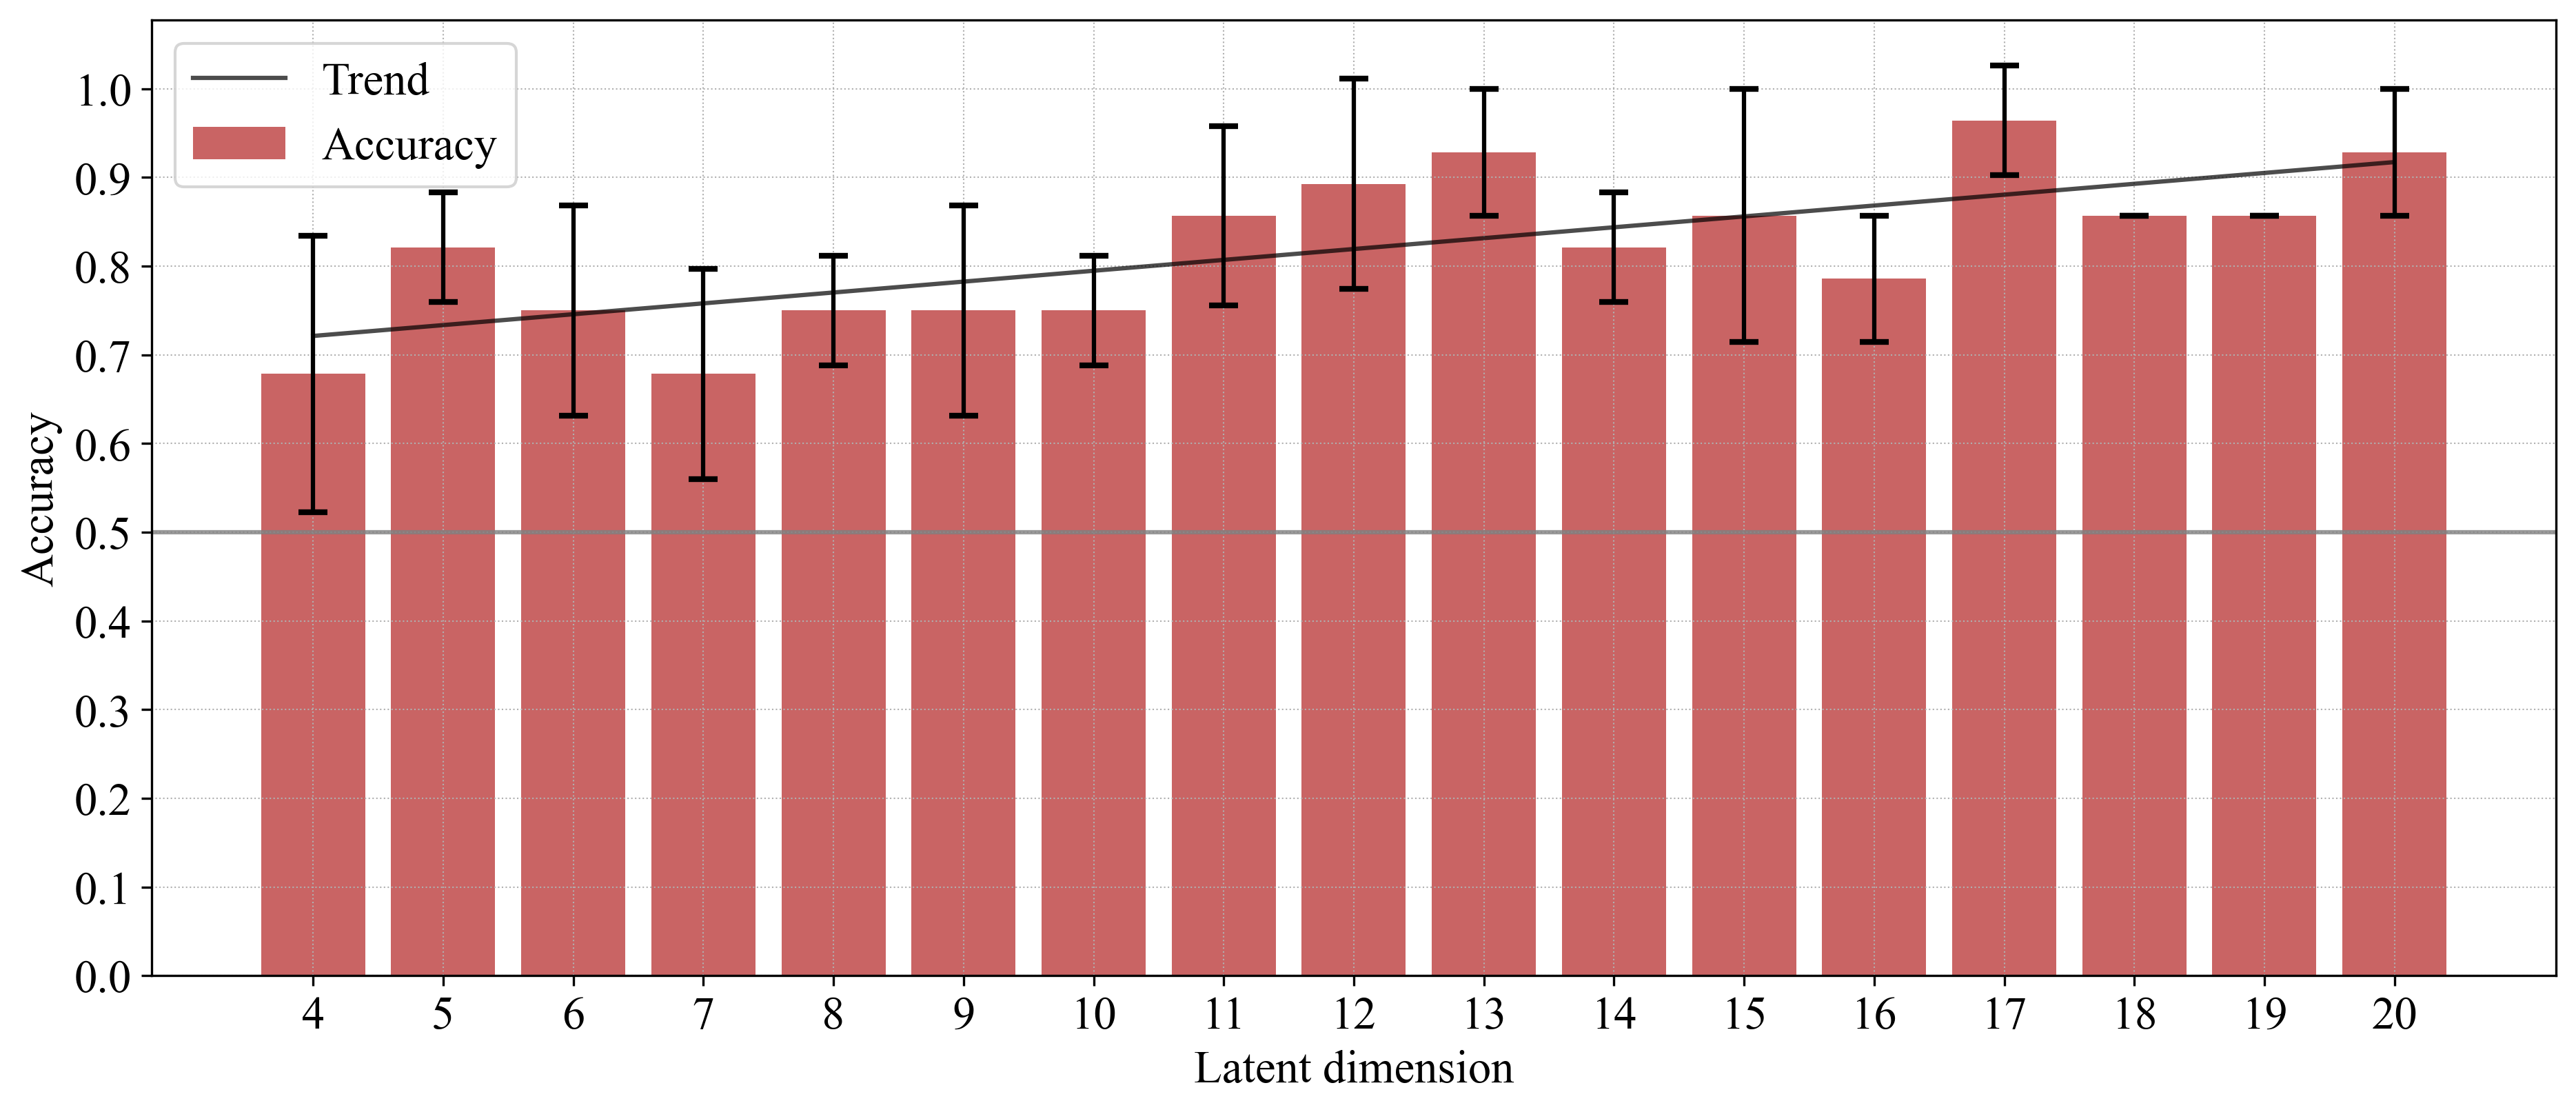

In [355]:
# plot accuracy with std across latent dimensions
plt.figure(figsize=(15, 6))
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

# Add line at 0.5
plt.axhline(y=0.5, color='grey', linestyle='-', alpha=0.8)

# Plotting the bars
plt.bar(latent_dims, reconstructed_accuracy, color='firebrick', alpha=0.7, label='Accuracy')

# Adding error bars
plt.errorbar(latent_dims, reconstructed_accuracy, yerr=reconstructed_accuracy_std, fmt='none', color='black', capsize=5, capthick=2)

# plot linear trend
plt.plot(latent_dims, np.poly1d(np.polyfit(latent_dims, reconstructed_accuracy, 1))(latent_dims), color='black', linestyle='-', label='Trend', alpha=0.7)

# plt.title('W & N3 classification accuracy across latent dimensions')
plt.xlabel('Latent dimension')
plt.ylabel('Accuracy')
plt.xticks(np.arange(4, 21, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

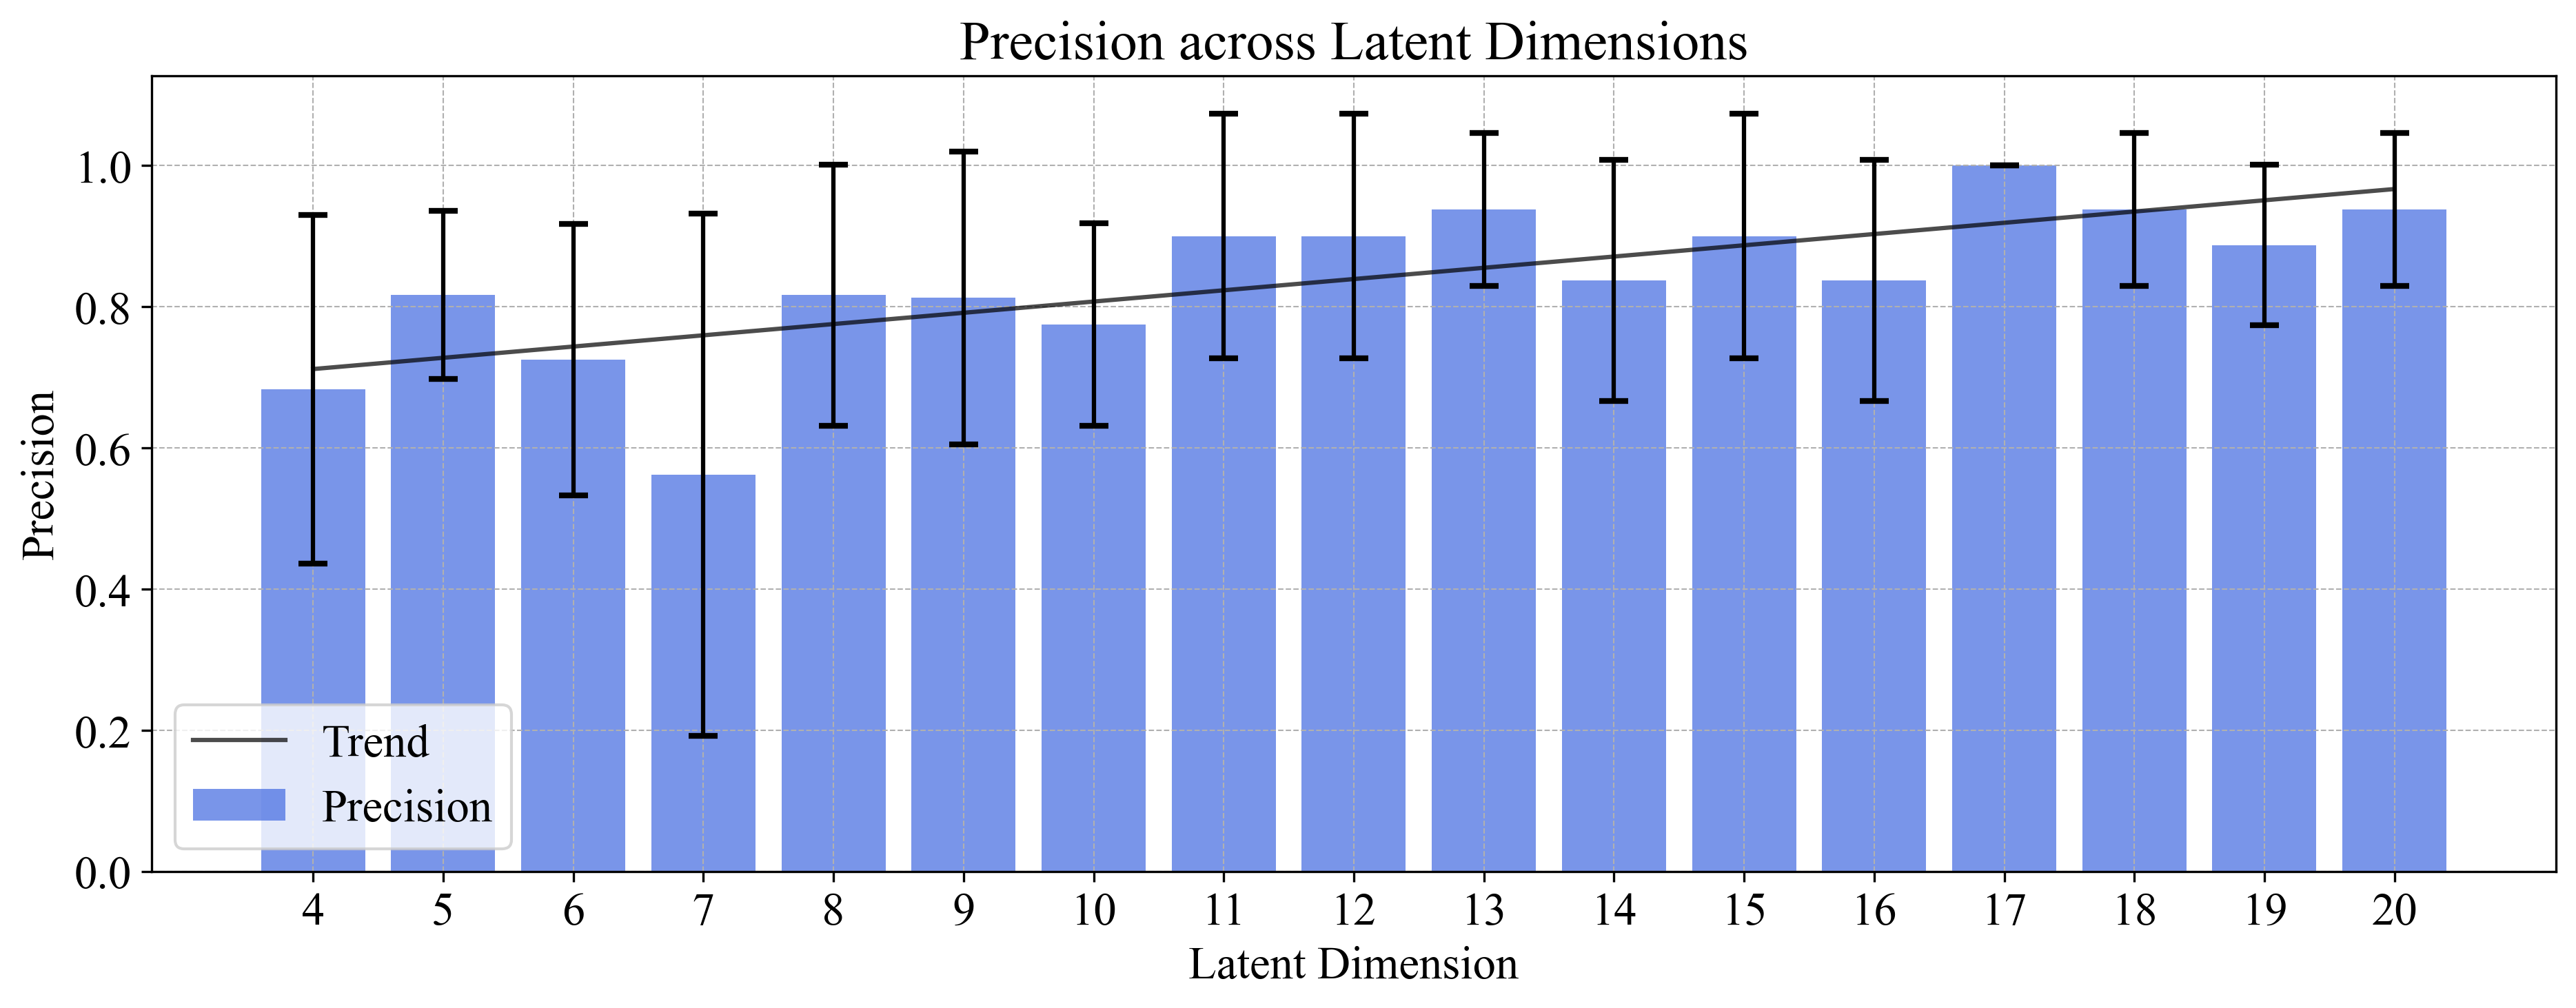

In [345]:
# plot precision with std across latent dimensions
plt.figure(figsize=(15, 5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.bar(latent_dims, reconstructed_precision, color='royalblue', alpha=0.7, label='Precision')
plt.errorbar(latent_dims, reconstructed_precision, yerr=reconstructed_precision_std, fmt='none', color='black', capsize=5, capthick=2)

plt.plot(latent_dims, np.poly1d(np.polyfit(latent_dims, reconstructed_precision, 1))(latent_dims), color='black', linestyle='-', label='Trend', alpha=0.7)

plt.title('Precision across Latent Dimensions')
plt.xlabel('Latent Dimension')
plt.ylabel('Precision')
plt.xticks(np.arange(4, 21, 1))
plt.legend()

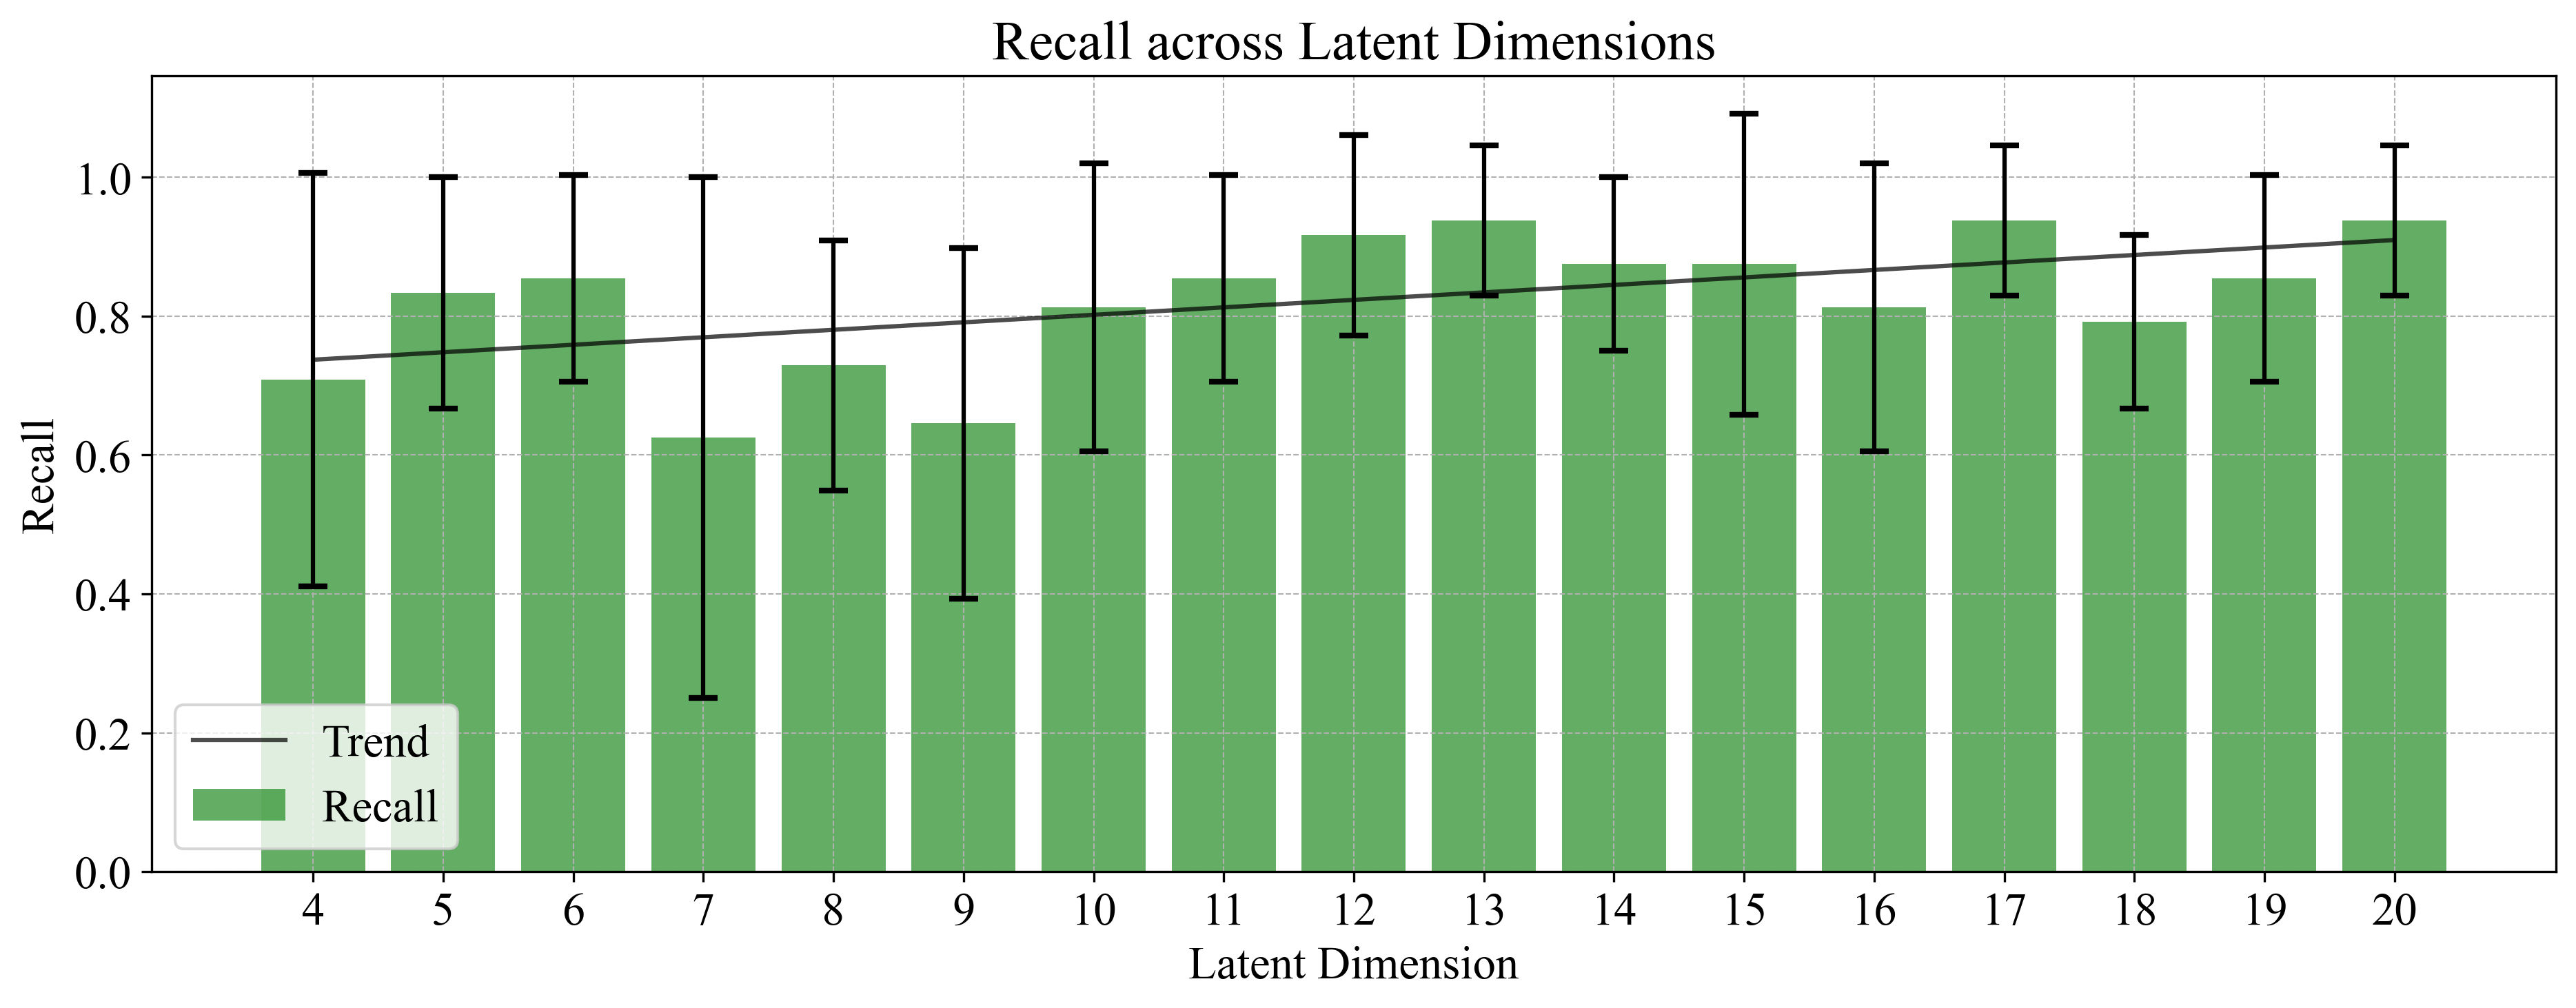

In [346]:
# plot recall with std across latent dimensions
plt.figure(figsize=(15, 5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.bar(latent_dims, reconstructed_recall, color='forestgreen', alpha=0.7, label='Recall')
plt.errorbar(latent_dims, reconstructed_recall, yerr=reconstructed_recall_std, fmt='none', color='black', capsize=5, capthick=2)

plt.plot(latent_dims, np.poly1d(np.polyfit(latent_dims, reconstructed_recall, 1))(latent_dims), color='black', linestyle='-', label='Trend', alpha=0.7)

plt.title('Recall across Latent Dimensions')
plt.xlabel('Latent Dimension')
plt.ylabel('Recall')
plt.xticks(np.arange(4, 21, 1))
plt.legend()

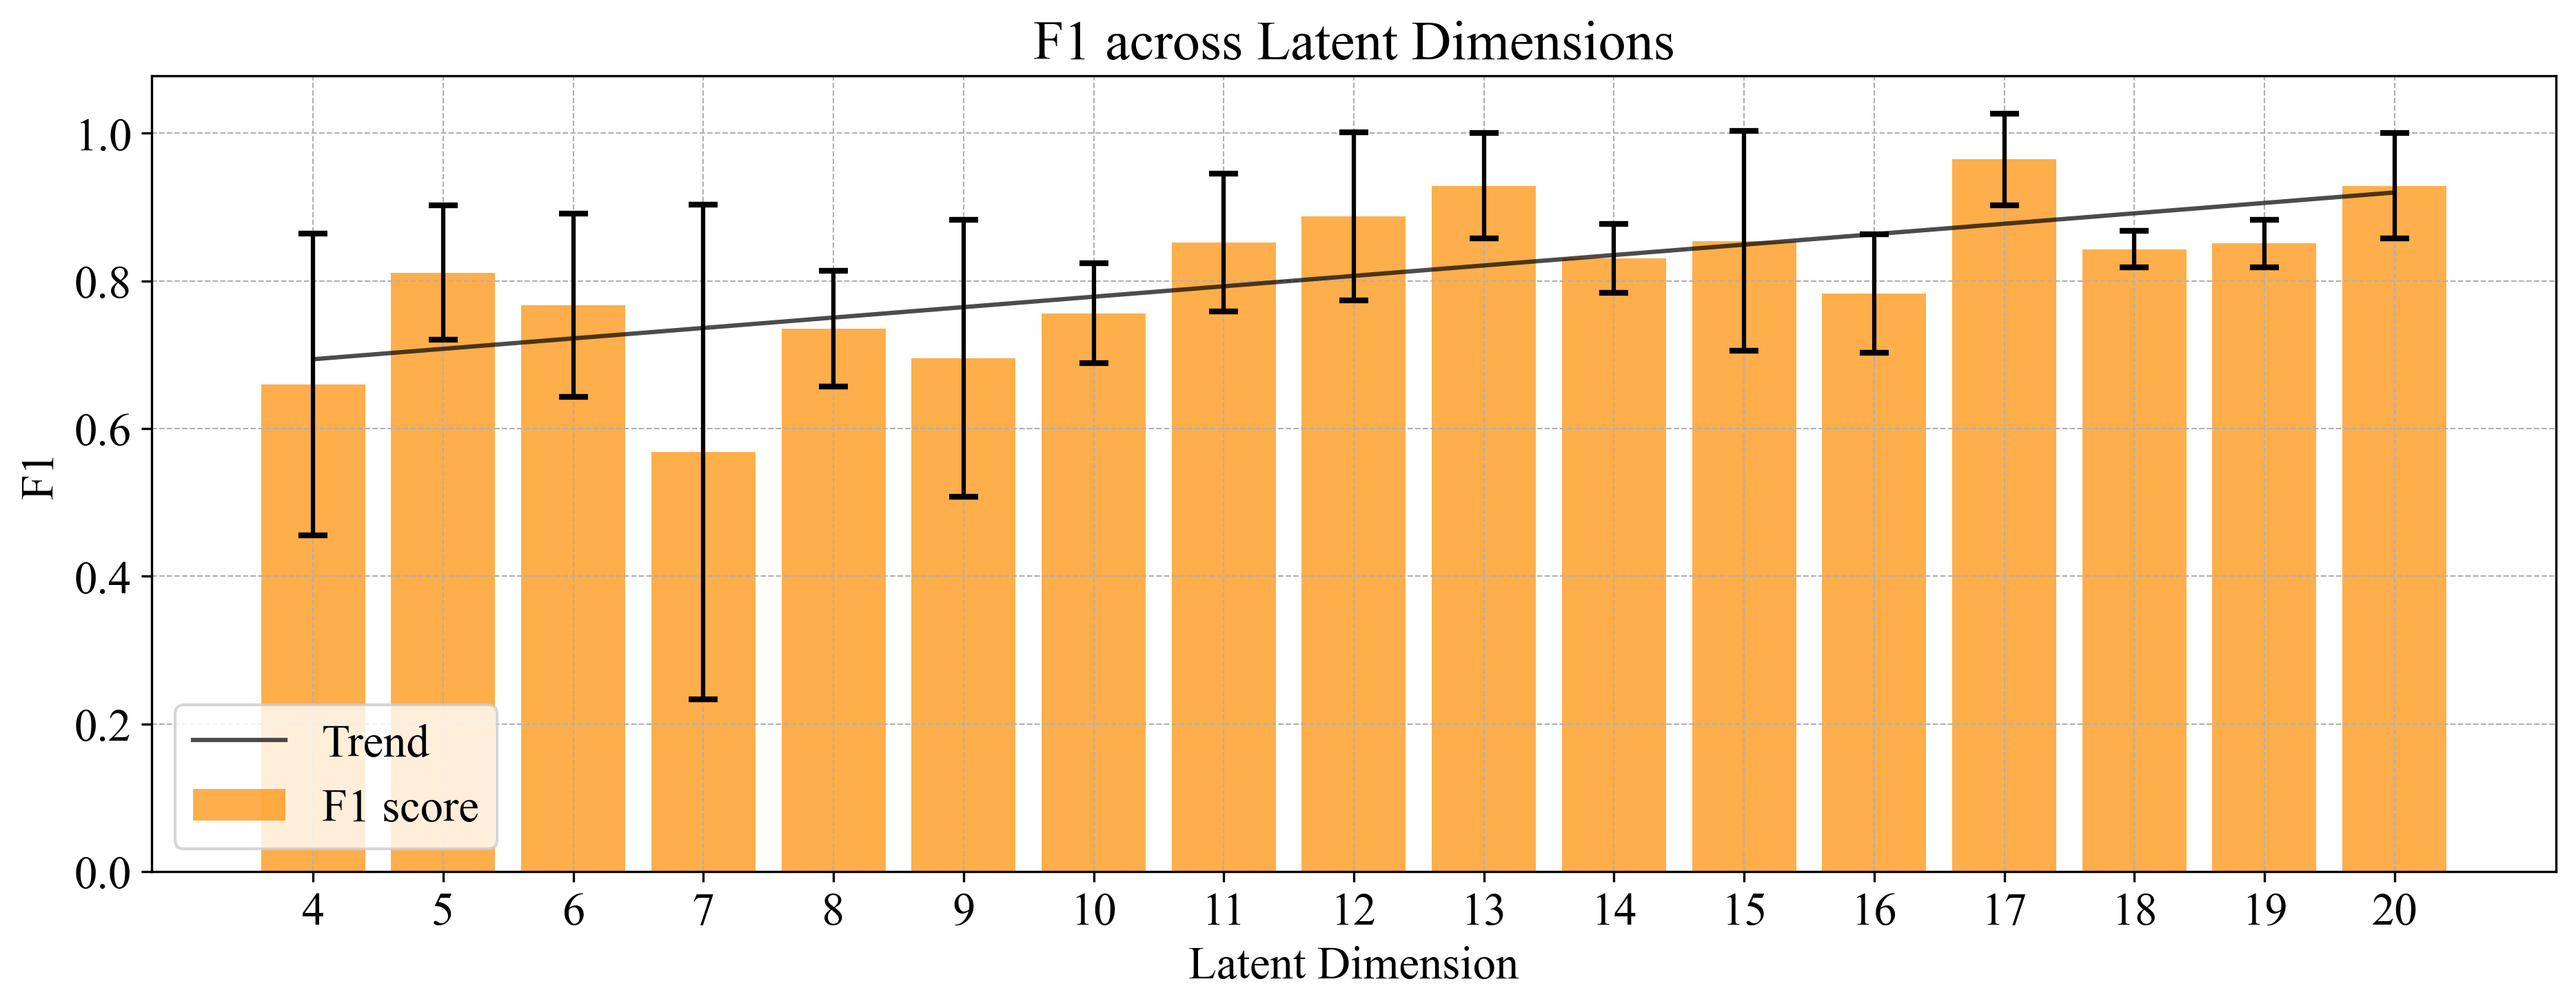

In [347]:
# plot f1 with std across latent dimensions
plt.figure(figsize=(15, 5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.bar(latent_dims, reconstructed_f1, color='darkorange', alpha=0.7, label='F1 score')
plt.errorbar(latent_dims, reconstructed_f1, yerr=reconstructed_f1_std, fmt='none', color='black', capsize=5, capthick=2)

plt.plot(latent_dims, np.poly1d(np.polyfit(latent_dims, reconstructed_f1, 1))(latent_dims), color='black', linestyle='-', label='Trend', alpha=0.7)

plt.title('F1 across Latent Dimensions')
plt.xlabel('Latent Dimension')
plt.ylabel('F1')
plt.xticks(np.arange(4, 21, 1))
plt.legend()

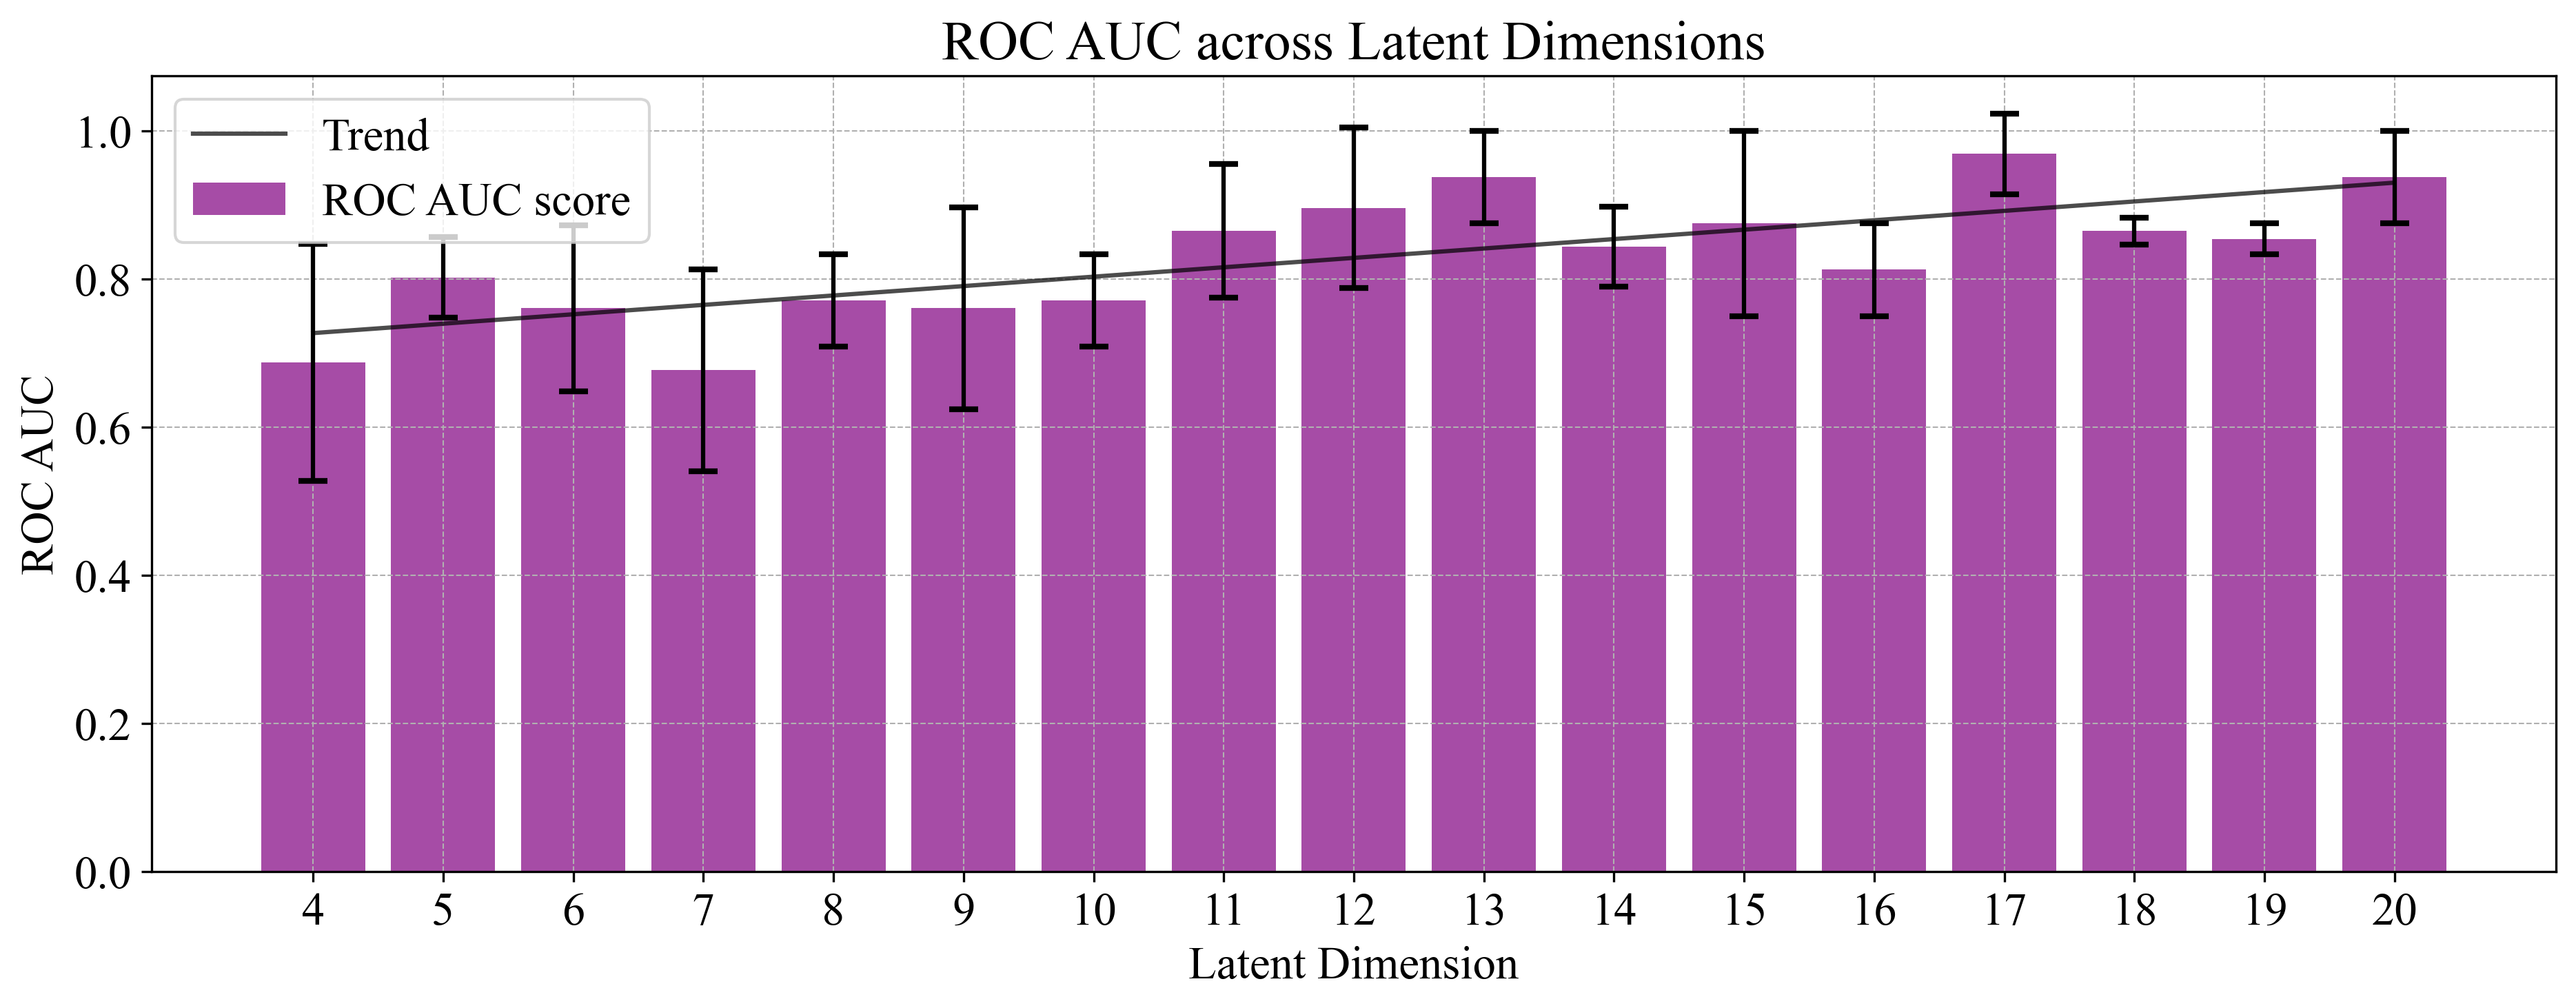

In [348]:
# plot roc_auc with std across latent dimensions
plt.figure(figsize=(15, 5))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.bar(latent_dims, reconstructed_roc_auc, color='purple', alpha=0.7, label='ROC AUC score')
plt.errorbar(latent_dims, reconstructed_roc_auc, yerr=reconstructed_roc_auc_std, fmt='none', color='black', capsize=5, capthick=2)

plt.plot(latent_dims, np.poly1d(np.polyfit(latent_dims, reconstructed_roc_auc, 1))(latent_dims), color='black', linestyle='-', label='Trend', alpha=0.7)

plt.title('ROC AUC across Latent Dimensions')
plt.xlabel('Latent Dimension')
plt.ylabel('ROC AUC')
plt.xticks(np.arange(4, 21, 1))
plt.legend()

In [349]:
reconstructed_fprs_lists = [
    [np.array([0. , 0.5, 1. ]), np.array([0. , 0.5, 1. ]), np.array([0., 0., 1.]), np.array([0.        , 0.33333333, 1.        ])],
    [np.array([0., 0., 1.]), np.array([0.  , 0.25, 1.  ]), np.array([0.        , 0.33333333, 1.        ]), np.array([0.        , 0.33333333, 1.        ])],
    [np.array([0. , 0.5, 1. ]), np.array([0. , 0.5, 1. ]), np.array([0., 0., 1.]), np.array([0.        , 0.33333333, 1.        ])],
    [np.array([0.  , 0.75, 1.  ]), np.array([0., 1.]), np.array([0., 0., 1.]), np.array([0.        , 0.33333333, 1.        ])],
    [np.array([0. , 0.5, 1. ]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0.  , 0.25, 1.  ]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0. , 0.5, 1. ]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0.        , 0.33333333, 1.        ])],
    [np.array([0. , 0.5, 1. ]), np.array([0., 0., 1.]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0. , 0.5, 1. ]), np.array([0., 0., 1.]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0. , 0.5, 1. ]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0. , 0.5, 1. ]), np.array([0., 0., 1.]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0. , 0.5, 1. ]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0., 0., 1.]), np.array([0., 0., 1.]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0., 0., 1.]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0., 0., 1.])],
    [np.array([0., 0., 1.]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0.        , 0.33333333, 1.        ])],
    [np.array([0., 0., 1.]), np.array([0.  , 0.25, 1.  ]), np.array([0., 0., 1.]), np.array([0., 0., 1.])]
]

reconstructed_tprs_lists = [
    [np.array([0., 1., 1.]), np.array([0.        , 0.33333333, 1.        ]), np.array([0. , 0.5, 1. ]), np.array([0., 1., 1.])],
    [np.array([0.        , 0.66666667, 1.        ]), np.array([0.        , 0.66666667, 1.        ]), np.array([0., 1., 1.]), np.array([0., 1., 1.])],
    [np.array([0.        , 0.66666667, 1.        ]), np.array([0., 1., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0., 1., 1.])],
    [np.array([0., 1., 1.]), np.array([0., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0.  , 0.75, 1.  ])],
    [np.array([0., 1., 1.]), np.array([0.        , 0.66666667, 1.        ]), np.array([0. , 0.5, 1. ]), np.array([0.  , 0.75, 1.  ])],
    [np.array([0., 1., 1.]), np.array([0.        , 0.33333333, 1.        ]), np.array([0. , 0.5, 1. ]), np.array([0.  , 0.75, 1.  ])],
    [np.array([0., 1., 1.]), np.array([0., 1., 1.]), np.array([0. , 0.5, 1. ]), np.array([0.  , 0.75, 1.  ])],
    [np.array([0., 1., 1.]), np.array([0.        , 0.66666667, 1.        ]), np.array([0.  , 0.75, 1.  ]), np.array([0., 1., 1.])],
    [np.array([0., 1., 1.]), np.array([0.        , 0.66666667, 1.        ]), np.array([0., 1., 1.]), np.array([0., 1., 1.])],
    [np.array([0., 1., 1.]), np.array([0., 1., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0., 1., 1.])],
    [np.array([0., 1., 1.]), np.array([0., 1., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0.  , 0.75, 1.  ])],
    [np.array([0., 1., 1.]), np.array([0., 1., 1.]), np.array([0. , 0.5, 1. ]), np.array([0., 1., 1.])],
    [np.array([0., 1., 1.]), np.array([0., 1., 1.]), np.array([0. , 0.5, 1. ]), np.array([0.  , 0.75, 1.  ])],
    [np.array([0., 1., 1.]), np.array([0., 1., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0., 1., 1.])],
    [np.array([0.        , 0.66666667, 1.        ]), np.array([0., 1., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0.  , 0.75, 1.  ])],
    [np.array([0.        , 0.66666667, 1.        ]), np.array([0., 1., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0., 1., 1.])],
    [np.array([0., 1., 1.]), np.array([0., 1., 1.]), np.array([0.  , 0.75, 1.  ]), np.array([0., 1., 1.])]
]

latent_dim_fpr = {}
latent_dim_tpr = {}

# Assuming latent dimensions range from 4 to 20
for i, dim in enumerate(range(4, 21)):
    latent_dim_fpr[dim] = reconstructed_fprs_lists[i]
    latent_dim_tpr[dim] = reconstructed_tprs_lists[i]

mean_fpr = {}
mean_tpr = {}

# Define the common range of FPR points for interpolation
common_fpr = np.linspace(0, 1, 100)

# Iterate over the dictionary keys (latent dimensions)
for dim in latent_dim_fpr.keys():
    # Get the FPR and TPR lists for the current dimension
    fpr_lists = latent_dim_fpr[dim]
    tpr_lists = latent_dim_tpr[dim]
    
    # Interpolated TPR lists
    interpolated_tprs = []
    
    for fpr, tpr in zip(fpr_lists, tpr_lists):
        interpolated_tpr = np.interp(common_fpr, fpr, tpr)
        interpolated_tprs.append(interpolated_tpr)
    
    # Calculate mean TPR for the common FPR points
    mean_fpr[dim] = common_fpr
    mean_tpr[dim] = np.mean(interpolated_tprs, axis=0)

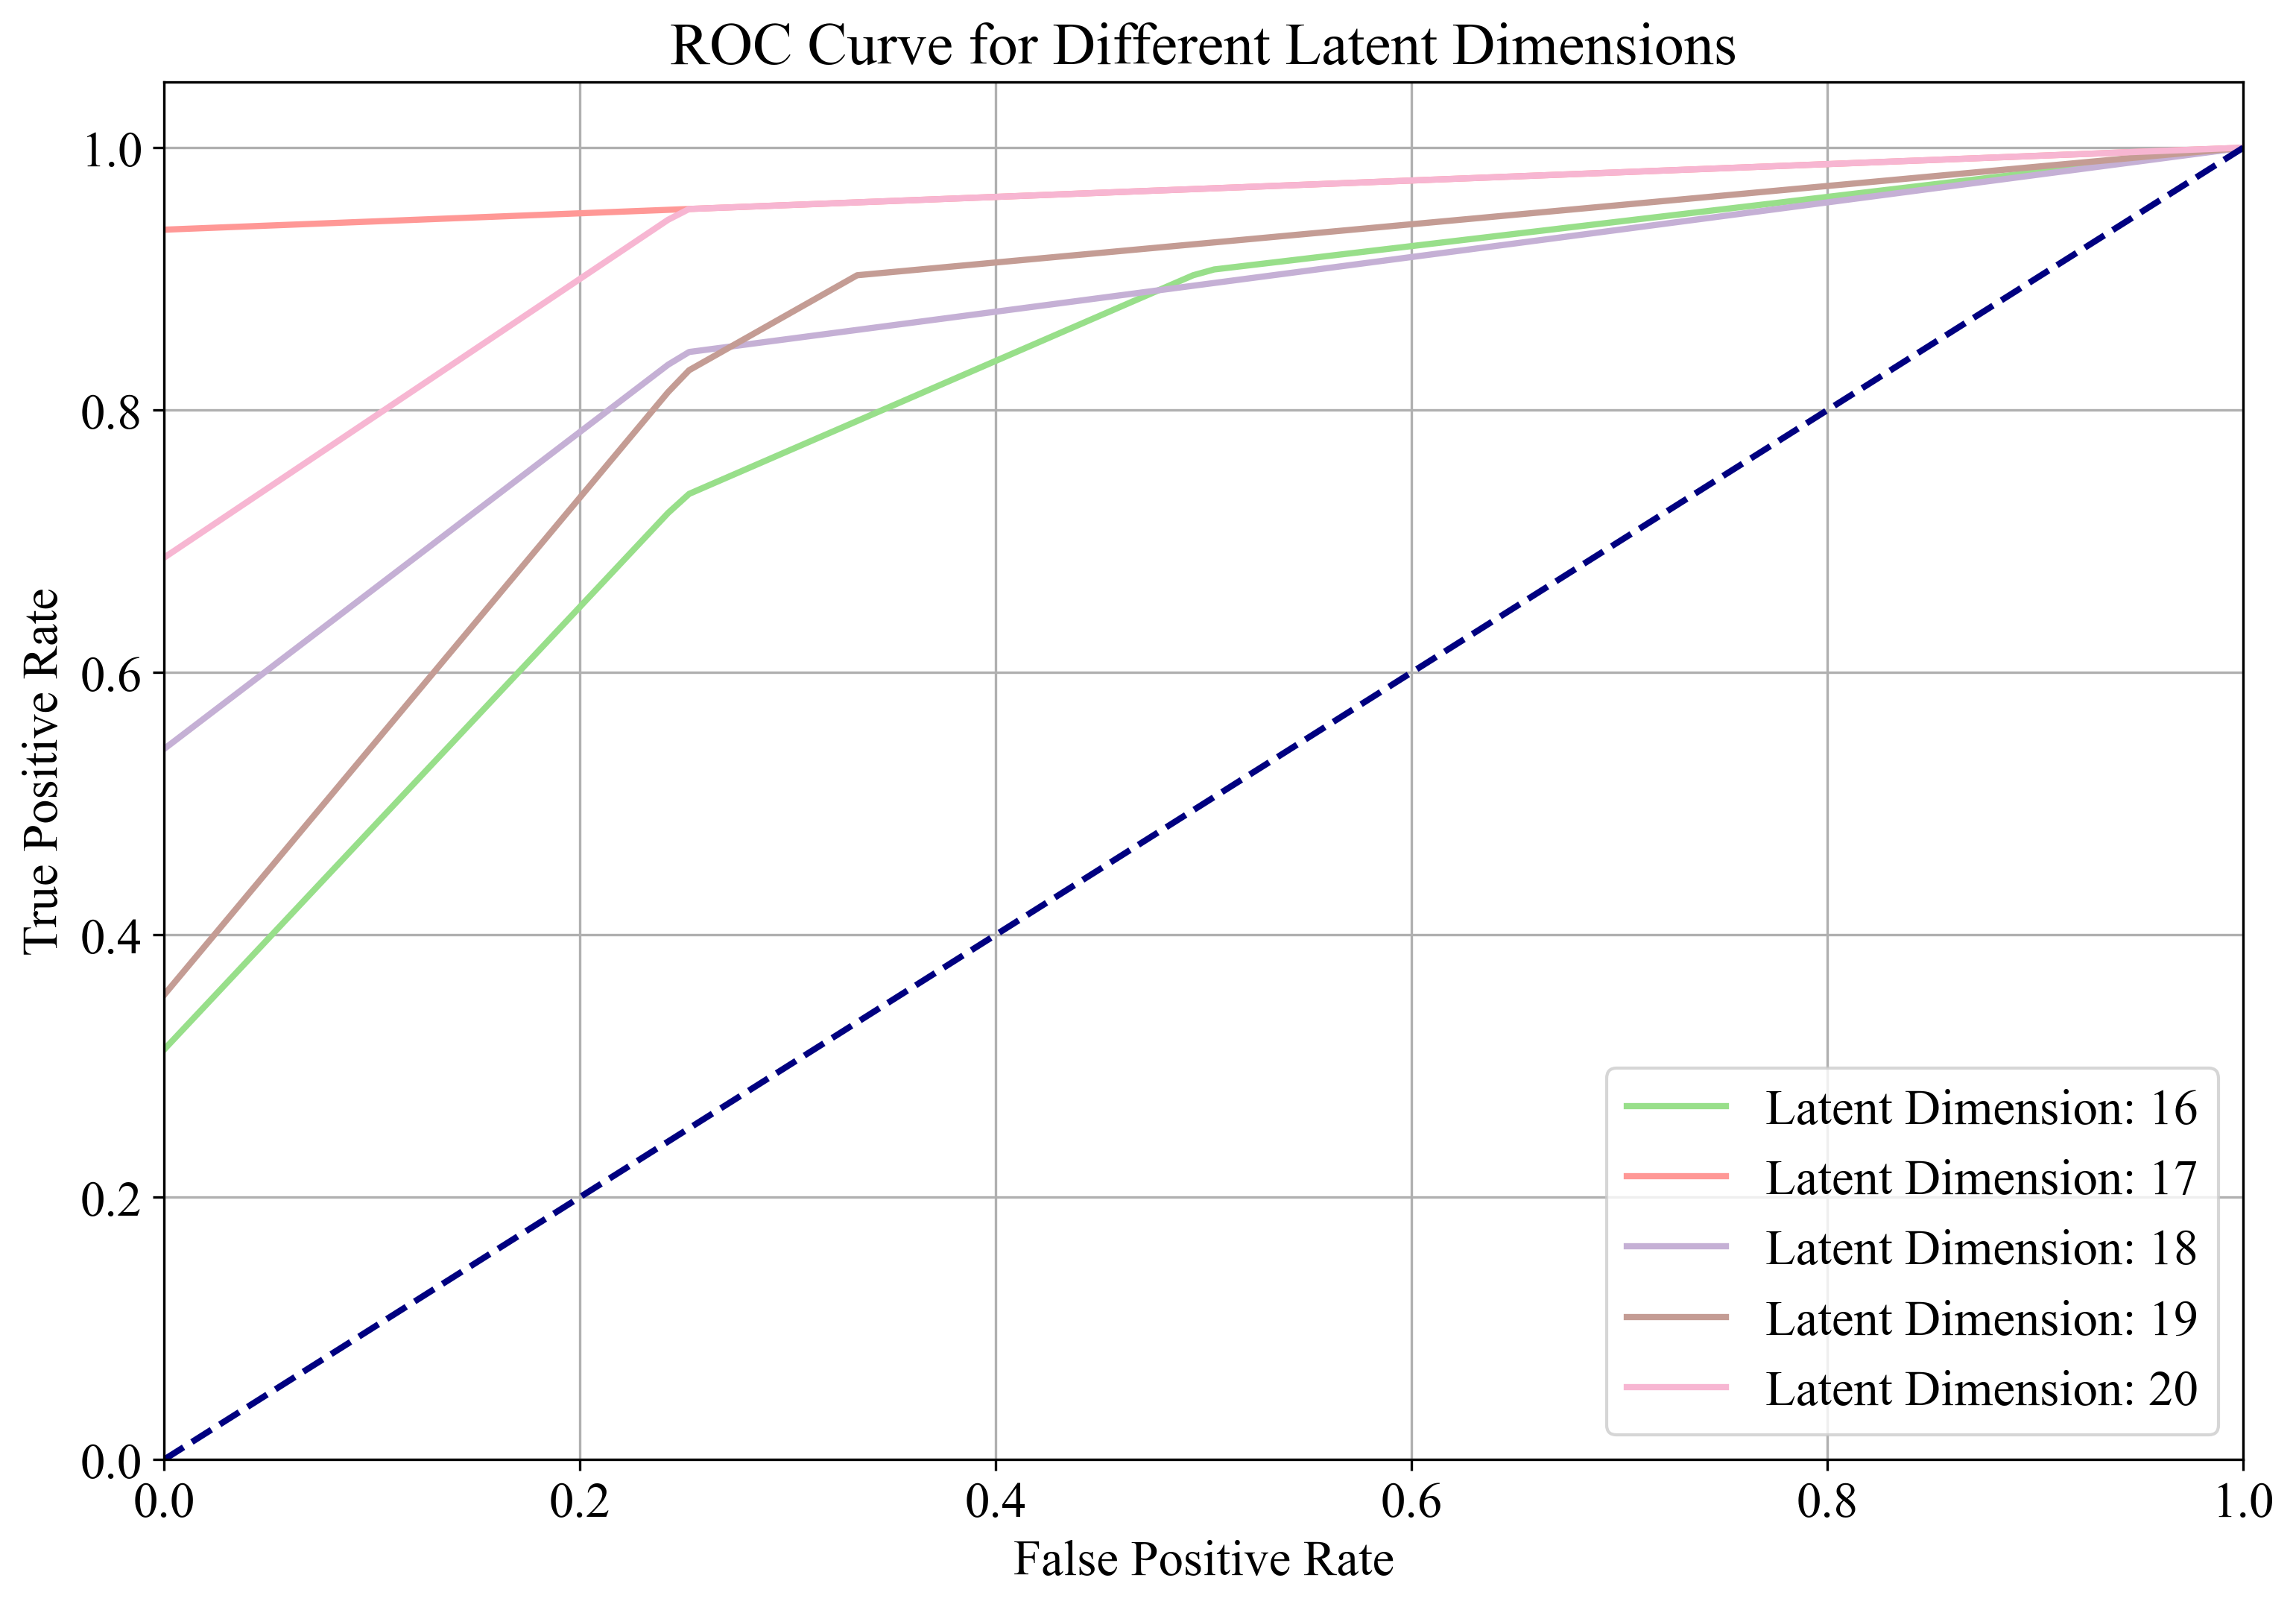

In [350]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', 
          '#c49c94', '#f7b6d2']

# Plot ROC curves for each latent dimension
plt.figure(figsize=(12, 8))
for dim, color in zip(mean_fpr.keys(), colors):
    if dim > 15:
        plt.plot(mean_fpr[dim], mean_tpr[dim], color=color, lw=2, label=f'Latent Dimension: {dim}')

# Add labels and title
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Latent Dimensions')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()